# 数据分布测试

In [1]:
import pandas as pd
import numpy as np
import warnings
from copy import deepcopy 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None) #显示Dateframe所有列
#pd.set_option('display.max_rows',None) #显示Dateframe所有行
# read from
HHdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\HHPUB.csv')
PERdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\PERPUB.csv')
VEHdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\VEHPUB.csv')
DAYdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\DAYPUB.csv')
LDTdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\LDTPUB.csv')
HH50WT = pd.read_csv('.\\Dataset\\replicate weights_ascii\\hh50wt.csv')
LDT50WT = pd.read_csv('.\\Dataset\\replicate weights_ascii\\ldt50wt.csv')
PR50WT = pd.read_csv('.\\Dataset\\replicate weights_ascii\\pr50wt.csv')
VEHdata_wt = pd.merge(VEHdata,HH50WT,left_on ='HOUSEID', right_on='ID9',how='left')
DAYdata_wt = pd.merge(DAYdata,PR50WT,left_on=['HOUSEID','PERSONID'],right_on=['ID9','PERSONID'],how='left')
LDTdata_wt = pd.merge(LDTdata,LDT50WT,left_on=['HOUSEID','PERSONID'],right_on=['HOUSEID','PERSONID'],how='left')

## Household Income

从household表里把household income取出来，用weight换算到national level，画一个分布。

In [2]:
HHdata['HHINCTTL'] #家庭年收入变量 是一个区间范围

0        18
1         4
2        -7
3        17
4         5
         ..
69812     5
69813    14
69814    13
69815    18
69816     9
Name: HHINCTTL, Length: 69817, dtype: int64

In [3]:
#sample size
df1 = HHdata.groupby('HHINCTTL')['HHINCTTL'].value_counts()
df1.index = df1.index.droplevel(level=0)
hhinc=pd.DataFrame(df1)
hhinc.columns = ['number of HH']
hhinc=hhinc.reset_index()
#print(hhinc)
#national level - Household at least 50% completed
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df2 = HHdata.groupby('HHINCTTL')['WTHHFIN'].sum()
hhinc2=pd.DataFrame(df2)
hhinc2.columns = ['number of HH_National']
hhinc2=hhinc2.reset_index()
hhinc['number of HH_National']= hhinc2['number of HH_National']
#print(hhinc)

#具体含义
hhinc['income'] = hhinc['HHINCTTL']
hhinc.income[hhinc.HHINCTTL==-9] = 'not ascertained'
hhinc.income[hhinc.HHINCTTL==-8] = 'don\'t konw'
hhinc.income[hhinc.HHINCTTL==-7] = 'refused'
hhinc.income[hhinc.HHINCTTL==-1] = 'appropriate skip'
hhinc.income[hhinc.HHINCTTL==1] = '<\$5000'
hhinc.income[hhinc.HHINCTTL==2] = '\$5000-\$9999'
hhinc.income[hhinc.HHINCTTL==3] = '\$10000-\$14999'
hhinc.income[hhinc.HHINCTTL==4] = '\$15000-\$19999'
hhinc.income[hhinc.HHINCTTL==5] = '\$20000-\$24999'
hhinc.income[hhinc.HHINCTTL==6] = '\$25000-\$29999'
hhinc.income[hhinc.HHINCTTL==7] = '\$30000-\$34999'
hhinc.income[hhinc.HHINCTTL==8] = '\$35000-\$39999'
hhinc.income[hhinc.HHINCTTL==9] = '\$40000-\$44999'
hhinc.income[hhinc.HHINCTTL==10] = '\$45000-\$49999'
hhinc.income[hhinc.HHINCTTL==11] = '\$50000-\$54999'
hhinc.income[hhinc.HHINCTTL==12] = '\$55000-\$59999'
hhinc.income[hhinc.HHINCTTL==13] = '\$60000-\$64999'
hhinc.income[hhinc.HHINCTTL==14] = '\$65000-\$69999'
hhinc.income[hhinc.HHINCTTL==15] = '\$70000-\$74999'
hhinc.income[hhinc.HHINCTTL==16] = '\$75000-\$79999'
hhinc.income[hhinc.HHINCTTL==17] = '\$80000-\$99999'
hhinc.income[hhinc.HHINCTTL==18] = '>=\$100000'

#hhinc.loc[22] = [np.nan, hhinc['number of HH'].sum(), hhinc['number of HH_National'].sum(), 'total',] #总数验证
order = ['HHINCTTL','income', 'number of HH','number of HH_National']
hhinc[order]

,HHINCTTL,income,number of HH,number of HH_National
0,-9,not ascertained,13,34897.85
1,-8,don't konw,1020,2313340.72
2,-7,refused,4725,5218821.71
3,-1,appropriate skip,725,1269409.05
4,1,<\$5000,1148,2792131.75
5,2,\$5000-\$9999,2870,6042175.51
6,3,\$10000-\$14999,2941,5580204.08
7,4,\$15000-\$19999,3802,6907403.39
8,5,\$20000-\$24999,3445,5851343.11
9,6,\$25000-\$29999,5011,8055014.42


<BarContainer object of 22 artists>

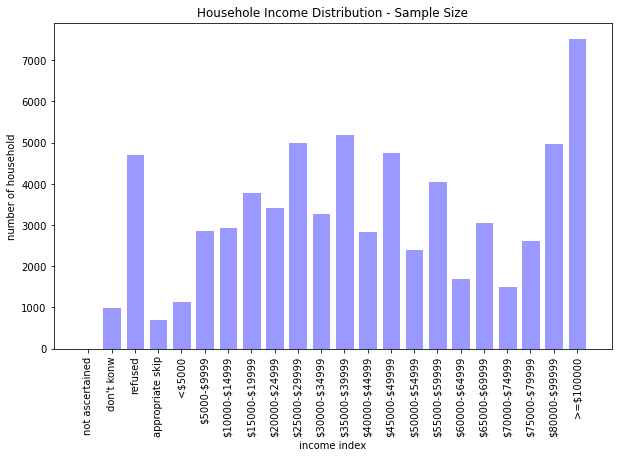

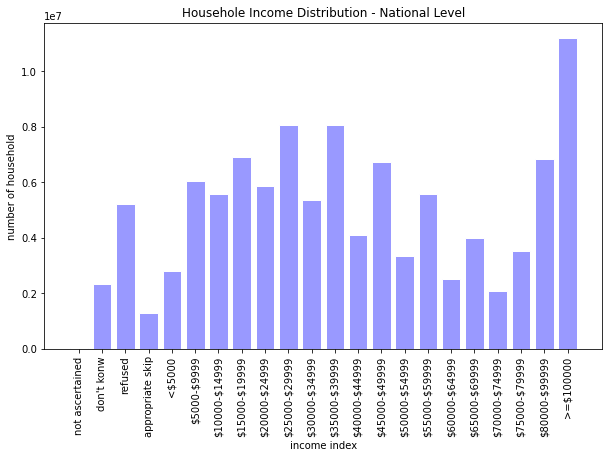

In [4]:
import matplotlib.pyplot as plt

#分布图-Sample Size
hhinc['income1'] = hhinc['HHINCTTL']
#hhinc.income1[hhinc.HHINCTTL<0] = -1 # Household income is not determined.
plt.figure(num=1,figsize=(10,6))
plt.title('Househole Income Distribution - Sample Size')
plt.xlabel('income index')
plt.ylabel('number of household')
plt.xticks(rotation=90) 
plt.bar(hhinc['income'], hhinc['number of HH'], facecolor='#9999ff', edgecolor='white')

#分布图-National Level
hhinc['income1'] = hhinc['HHINCTTL']
#hhinc.income1[hhinc.HHINCTTL<0] = -1 # Household income is not determined.
plt.figure(num=2,figsize=(10,6))
plt.title('Househole Income Distribution - National Level')
plt.xlabel('income index')
plt.ylabel('number of household')
plt.xticks(rotation=90) 
plt.bar(hhinc['income'], hhinc['number of HH_National'], facecolor='#9999ff', edgecolor='white')

In [5]:
# #另一种方法
# plt.figure(figsize=(7,5))
# plt.title('Househole Income Distribution - Sample Size')
# plt.xlabel('income index')
# plt.ylabel('number of household')
# HHdata['HHINCTTL'].hist(color='r', alpha=0.6, bins=60)

## Person Miles of Travel

### 家庭人均每次出行距离（miles/人次）

按照方式将household file的人均(每次)出行距离取出来

In [6]:
DAYdata[['TDCASEID','HOUSEID','PERSONID','TDTRPNUM','TRPTRANS','TRPMILES','WTTRDFIN']].head(10) 
#'TRPTRANS'-Trip Mode
#'TRPMILES'-Trip distance in miles

,TDCASEID,HOUSEID,PERSONID,TDTRPNUM,TRPTRANS,TRPMILES,WTTRDFIN
0,100000180101,10000018,1,1,26,0.56,4448782.18
1,100000180102,10000018,1,2,26,0.56,4448782.18
2,100000180103,10000018,1,3,1,1.00,4448782.18
3,100000180104,10000018,1,4,1,5.00,4448782.18
4,100000180105,10000018,1,5,1,5.00,4448782.18
5,100000180201,10000018,2,1,26,0.56,5096812.46
6,100000180202,10000018,2,2,26,0.56,5096812.46
7,100000180203,10000018,2,3,1,1.00,5096812.46
8,100000180204,10000018,2,4,1,5.00,5096812.46
9,100000180205,10000018,2,5,1,5.00,5096812.46


In [7]:
#(TRPTRANS = 01-07)POV travel includes car, van, SUV, pickup or other truck, RV, or motorcycle.
#(TRPTRANS = 08-09)AIR travel includes Commercial/charter airplane, Private/corporate airplane.
#(TRPTRANS = 10-14)BUS travel includes public transit, commuter bus, school,or charter.
#(TRPTRANS = 15-18)TRAIN travel includes Amtrack, commuter train, subway/rail, or street car.
#(TRPTRANS = 19-21)SHIP includes Ship/cruise、Passenger line/ferry、Sailboat/motorboat/yacht.
#(TRPTRANS = 26)WALK.
#(TRPTRANS = 22-25,91)Other includes taxi, limo, shuttle, bicycle, and other modes.
data={'MODEINDEX':['01-07','08-09','10-14','15-18','19-21','26','22-25,91'],
      'TRANSMODE':['POV','AIR','BUS','TRAIN','SHIP','WALK','OTHER'],
      'AVGHHPMT':[0,0,0,0,0,0,0]}
avgpmt = pd.DataFrame(data) #集合成六种出行方式的统计表格
DAYdata1 = DAYdata
DAYdata1 = DAYdata1.drop(DAYdata1[DAYdata1['TRPMILES']<0].index) #不考虑DAYdata['TRPMILES']<0 (Not determined)

In [8]:
#(TRPTRANS = 01-07)POV travel includes car, van, SUV, pickup or other truck, RV, or motorcycle.
#计算各家庭加权人均出行里程（miles/人次）
a = DAYdata1[(DAYdata1['TRPTRANS']>=1)&(DAYdata1['TRPTRANS']<=7)].groupby(['HOUSEID'])['WTTRDFIN'].sum() #各家庭加权出行次数（人次）
DAYdata1['WTTRPMILES'] = DAYdata1['WTTRDFIN']*DAYdata1['TRPMILES'] #加权出行里程
b = DAYdata1[(DAYdata1['TRPTRANS']>=1)&(DAYdata1['TRPTRANS']<=7)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭加权出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
#print(c)
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='POV']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

        avgPMT
count 61400.00
mean     11.54
std      24.23
min       0.00
25%       3.46
50%       6.50
75%      12.00
max    1600.00


In [9]:
#(TRPTRANS = 08-09)AIR travel includes Commercial/charter airplane, Private/corporate airplane.
a = DAYdata1[(DAYdata1['TRPTRANS']>=8)&(DAYdata1['TRPTRANS']<=9)].groupby(['HOUSEID'])['WTTRDFIN'].sum() #各家庭出行次数（人次）
b = DAYdata1[(DAYdata1['TRPTRANS']>=8)&(DAYdata1['TRPTRANS']<=9)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avghhpmt.head(10) #某方式下家庭人均出行里程（miles/人次）
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='AIR']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

       avgPMT
count  276.00
mean  1043.72
std   1072.87
min      1.00
25%    350.00
50%    700.00
75%   1500.00
max   7000.00


In [10]:
#(TRPTRANS = 10-14)BUS travel includes public transit, commuter bus, school,or charter.
a = DAYdata1[(DAYdata1['TRPTRANS']>=10)&(DAYdata1['TRPTRANS']<=14)].groupby(['HOUSEID'])['WTTRDFIN'].sum() #各家庭出行次数（人次）
b = DAYdata1[(DAYdata1['TRPTRANS']>=10)&(DAYdata1['TRPTRANS']<=14)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avghhpmt.head(10) #某方式下家庭人均出行里程（miles/人次）
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='BUS']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

       avgPMT
count 6392.00
mean     9.36
std     41.10
min      0.00
25%      2.00
50%      4.33
75%      8.50
max   2800.00


In [11]:
#(TRPTRANS = 15-18)TRAIN travel includes Amtrack, commuter train, subway/rail, or street car.
a = DAYdata1[(DAYdata1['TRPTRANS']>=15)&(DAYdata1['TRPTRANS']<=18)].groupby(['HOUSEID'])['WTTRDFIN'].sum() #各家庭出行次数（人次）
b = DAYdata1[(DAYdata1['TRPTRANS']>=15)&(DAYdata1['TRPTRANS']<=18)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avghhpmt.head(10) #某方式下家庭人均出行里程（miles/人次）
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='TRAIN']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

       avgPMT
count 1054.00
mean    21.16
std     67.77
min      0.00
25%      4.22
50%      9.77
75%     22.41
max   1800.00


In [12]:
#(TRPTRANS = 19-21)SHIP includes Ship/cruise、Passenger line/ferry、Sailboat/motorboat/yacht.
a = DAYdata1[(DAYdata1['TRPTRANS']>=19)&(DAYdata1['TRPTRANS']<=21)].groupby(['HOUSEID'])['WTTRDFIN'].sum()  #各家庭出行次数（人次）
b = DAYdata1[(DAYdata1['TRPTRANS']>=19)&(DAYdata1['TRPTRANS']<=21)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avghhpmt.head(10) #某方式下家庭人均出行里程（miles/人次）
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='SHIP']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

       avgPMT
count  131.00
mean    17.18
std     32.20
min      0.00
25%      2.00
50%      6.00
75%     17.75
max    220.00


In [13]:
#(TRPTRANS = 26)WALK.
a = DAYdata1[(DAYdata1['TRPTRANS']==26)].groupby(['HOUSEID'])['WTTRDFIN'].sum() #各家庭出行次数（人次）
b = DAYdata1[(DAYdata1['TRPTRANS']==26)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avghhpmt.head(10) #某方式下家庭人均出行里程（miles/人次）
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='WALK']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

        avgPMT
count 16756.00
mean      0.89
std       1.32
min       0.00
25%       0.33
50%       0.50
75%       1.00
max      50.00


In [14]:
#(TRPTRANS = 22-25,91)Other includes taxi, limo, shuttle, bicycle, and other modes.
a = DAYdata1[((DAYdata1['TRPTRANS']>=22)&(DAYdata1['TRPTRANS']<=25))|(DAYdata1['TRPTRANS']==91)].groupby(['HOUSEID'])['WTTRDFIN'].sum() #各家庭出行次数（人次）
b = DAYdata1[((DAYdata1['TRPTRANS']>=22)&(DAYdata1['TRPTRANS']<=25))|(DAYdata1['TRPTRANS']==91)].groupby(['HOUSEID'])['WTTRPMILES'].sum() #各家庭出行里程总数（miles）
c = b/a #各家庭人均出行里程（miles/人次）
avghhpmt=pd.DataFrame(c) #avg hh PMT
avghhpmt.columns = ['avgPMT']
avghhpmt=avghhpmt.reset_index()
avghhpmt.head(10) #某方式下家庭人均出行里程（miles/人次）
avgpmt.AVGHHPMT[avgpmt.TRANSMODE=='OTHER']=avghhpmt['avgPMT'].mean()
print(avghhpmt.describe())
#avghhpmt #某方式下家庭人均出行里程（miles/人次）

       avgPMT
count 3285.00
mean     5.55
std     71.07
min      0.00
25%      0.50
50%      1.60
75%      4.00
max   4000.00


In [15]:
avgpmt

,MODEINDEX,TRANSMODE,AVGHHPMT
0,01-07,POV,11.54
1,08-09,AIR,1043.72
2,10-14,BUS,9.36
3,15-18,TRAIN,21.16
4,19-21,SHIP,17.18
5,26,WALK,0.89
6,"22-25,91",OTHER,5.55


<BarContainer object of 6 artists>

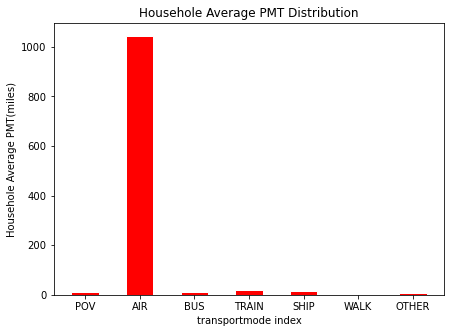

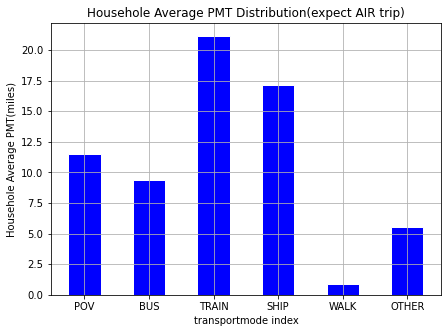

In [16]:
#各出行方式下，每次出行的家庭人均出行里程-分布图
plt.figure(figsize=(7,5))
plt.title('Househole Average PMT Distribution')
plt.xlabel('transportmode index')
plt.ylabel('Househole Average PMT(miles)')
plt.bar(avgpmt['TRANSMODE'], avgpmt['AVGHHPMT'], facecolor='r', edgecolor='white',width=0.5)

#分布图-删掉了AIR trip 由于其家庭人均出行里程较大
avgpmtnota=avgpmt.drop(labels=1) 
plt.figure(figsize=(7,5))
plt.title('Househole Average PMT Distribution(expect AIR trip)')
plt.xlabel('transportmode index')
plt.ylabel('Househole Average PMT(miles)')
plt.grid()
plt.bar(avgpmtnota['TRANSMODE'], avgpmtnota['AVGHHPMT'], facecolor='b', edgecolor='white',width=0.5)

### 家庭人均出行总距离（miles/人）

按照方式将household的人均出行总距离取出来

In [17]:
DAYdata1[['TDCASEID','HOUSEID','PERSONID','TDTRPNUM','TRPTRANS','TRPMILES','WTTRDFIN']].head() 
DAYdata1['WTTRPMILES'] = DAYdata1['TRPMILES']*DAYdata1['WTTRDFIN']
DAYdata1[['TDCASEID','HOUSEID','PERSONID','TDTRPNUM','TRPTRANS','TRPMILES','WTTRDFIN','WTTRPMILES']].head() 

,TDCASEID,HOUSEID,PERSONID,TDTRPNUM,TRPTRANS,TRPMILES,WTTRDFIN,WTTRPMILES
0,100000180101,10000018,1,1,26,0.56,4448782.18,2471545.65
1,100000180102,10000018,1,2,26,0.56,4448782.18,2471545.65
2,100000180103,10000018,1,3,1,1.00,4448782.18,4448782.18
3,100000180104,10000018,1,4,1,5.00,4448782.18,22243910.88
4,100000180105,10000018,1,5,1,5.00,4448782.18,22243910.88


In [18]:
HHdata[['HOUSEID','WTHHFIN']].head(10)
aa = pd.merge(left=DAYdata1, right=HHdata, on="HOUSEID",how="left")
#DAYdata1['WTHHFIN'] = HHdata['WTHHFIN'] #weighted hh number
DAYdata1['WTHHFIN'] = aa['WTHHFIN'] #家庭权重
#aa[['HOUSEID','PERSONID','TDCASEID','WTHHFIN']].head(20)
#DAYdata1[['TDCASEID','HOUSEID','WTHHFIN','PERSONID','TDTRPNUM','TRPTRANS','TRPMILES','WTTRDFIN','WTTRPMILES']].head(20) 

,HOUSEID,avgtotalPMT,WTHHFIN
0,10000018,11.00,10455.93
1,10000045,23.00,3360.30
2,10000474,24.89,2270.98
3,10000577,168.50,3633.47
4,10000652,15.00,2066.72
...,...,...,...
61395,810383636,510.50,150.16
61396,810383775,9.00,346.82
61397,810383805,2.50,105.17
61398,810383823,15.00,201.90


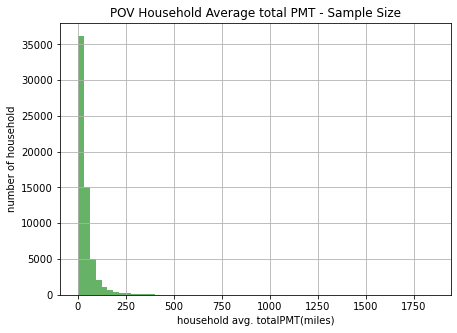

In [19]:
#(TRPTRANS = 01-07)POV travel includes car, van, SUV, pickup or other truck, RV, or motorcycle.
d = DAYdata1[(DAYdata1['TRPTRANS']>=1)&(DAYdata1['TRPTRANS']<=7)].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[(DAYdata1['TRPTRANS']>=1)&(DAYdata1['TRPTRANS']<=7)].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='POV']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

#National level
bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

,HOUSEID,avgtotalPMT,WTHHFIN
0,10088922,456.00,3239.84
1,10183957,225.00,4354.40
2,10289578,7.00,2205.53
3,10300464,333.33,936.90
4,10324031,1750.00,3169.25
...,...,...,...
271,7M0008198,3.67,225.67
272,7M0009459,66.67,88.62
273,7M0009561,400.00,83.46
274,7M0009807,520.00,116.36


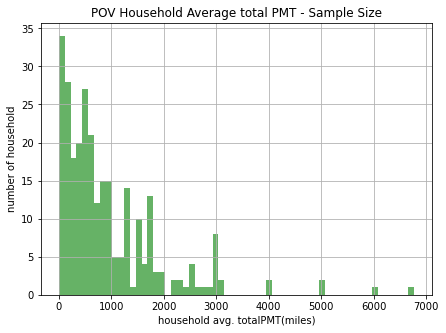

In [20]:
#(TRPTRANS = 08-09)AIR travel includes Commercial/charter airplane, Private/corporate airplane.
d = DAYdata1[(DAYdata1['TRPTRANS']>=8)&(DAYdata1['TRPTRANS']<=9)].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[(DAYdata1['TRPTRANS']>=8)&(DAYdata1['TRPTRANS']<=9)].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

#avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='AIR']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

,HOUSEID,avgtotalPMT,WTHHFIN
0,10001480,5.22,8683.69
1,10002188,7.00,1451.10
2,10003372,2.00,2473.14
3,10005732,20.00,2230.80
4,10007334,3.00,3512.64
...,...,...,...
6387,810381052,20.75,376.83
6388,810381258,1.48,2481.32
6389,810381285,4.00,273.16
6390,810381995,1.33,85.30


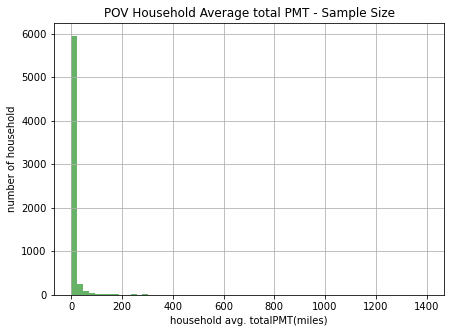

In [21]:
#(TRPTRANS = 10-14)BUS travel includes public transit, commuter bus, school,or charter.
d = DAYdata1[(DAYdata1['TRPTRANS']>=10)&(DAYdata1['TRPTRANS']<=14)].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[(DAYdata1['TRPTRANS']>=10)&(DAYdata1['TRPTRANS']<=14)].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

#avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='BUS']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

#National level
bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

,HOUSEID,avgtotalPMT,WTHHFIN
0,10002188,13.00,1451.10
1,10115396,2.50,2826.24
2,10116544,7.00,1433.34
3,10142495,15.00,3173.94
4,10153035,23.33,3184.87
...,...,...,...
1049,810255117,10.00,3164.94
1050,810263019,2.00,715.85
1051,810303746,6.25,1483.69
1052,810381052,2.00,376.83


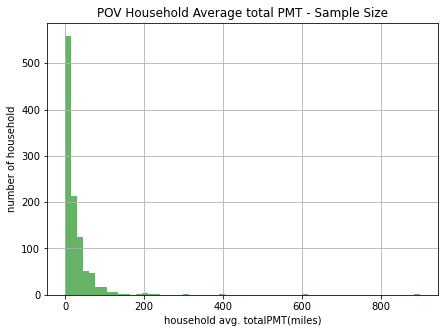

In [22]:
#(TRPTRANS = 15-18)TRAIN travel includes Amtrack, commuter train, subway/rail, or street car.
d = DAYdata1[(DAYdata1['TRPTRANS']>=15)&(DAYdata1['TRPTRANS']<=18)].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[(DAYdata1['TRPTRANS']>=15)&(DAYdata1['TRPTRANS']<=18)].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

#avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='TRAIN']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

#National level
bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

,HOUSEID,avgtotalPMT,WTHHFIN
0,10038196,2.67,2496.65
1,10265303,75.00,5003.63
2,10300464,4.00,936.90
3,10554043,2.00,469.51
4,10584291,15.00,2870.89
...,...,...,...
126,7M0006636,1.00,71.53
127,7M0010468,150.00,144.78
128,810003907,15.00,4964.27
129,810013036,140.00,3381.31


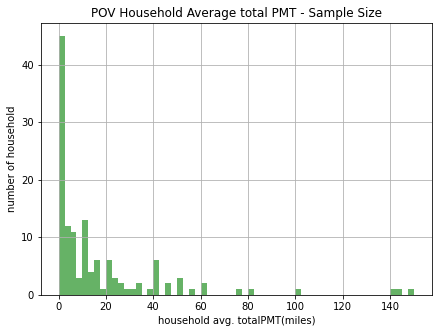

In [23]:
#(TRPTRANS = 19-21)SHIP includes Ship/cruise、Passenger line/ferry、Sailboat/motorboat/yacht.
d = DAYdata1[(DAYdata1['TRPTRANS']>=19)&(DAYdata1['TRPTRANS']<=21)].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[(DAYdata1['TRPTRANS']>=19)&(DAYdata1['TRPTRANS']<=21)].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

#avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='SHIP']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

#National level
bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

,HOUSEID,avgtotalPMT,WTHHFIN
0,10000018,1.11,10455.93
1,10000894,0.33,2632.20
2,10001480,1.22,8683.69
3,10001819,2.00,725.08
4,10003103,1.00,1101.42
...,...,...,...
16751,810383300,0.70,7674.24
16752,810383373,0.11,151.18
16753,810383382,2.00,615.35
16754,810383485,2.00,22.86


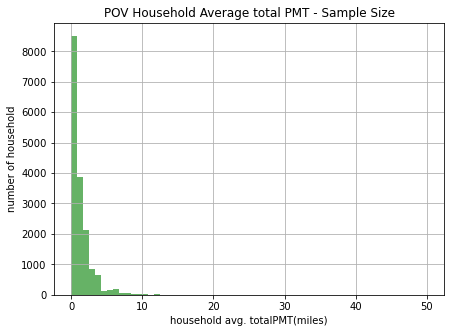

In [24]:
#(TRPTRANS = 26)WALK.
d = DAYdata1[DAYdata1['TRPTRANS']==26].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[DAYdata1['TRPTRANS']==26].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

#avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='WALK']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

#National level
bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

,HOUSEID,avgtotalPMT,WTHHFIN
0,10005509,14.00,614.73
1,10005732,12.00,2230.80
2,10008005,1.67,2188.26
3,10011069,36.00,2714.29
4,10012534,8.00,2554.34
...,...,...,...
3280,810335372,14.00,463.48
3281,810378856,0.75,80.13
3282,810379705,26.00,80.47
3283,810381258,9.63,2481.32


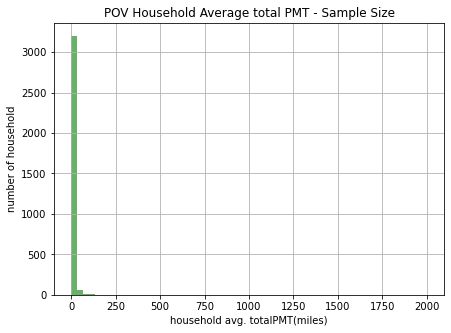

In [25]:
#(TRPTRANS = 22-25,91)Other includes taxi, limo, shuttle, bicycle, and other modes.
d = DAYdata1[((DAYdata1['TRPTRANS']>=22)&(DAYdata1['TRPTRANS']<=25))|(DAYdata1['TRPTRANS']==91)].groupby(['HOUSEID'])['PERSONID'].max() #家庭出行人数(人)
e = DAYdata1[((DAYdata1['TRPTRANS']>=22)&(DAYdata1['TRPTRANS']<=25))|(DAYdata1['TRPTRANS']==91)].groupby(['HOUSEID'])['TRPMILES'].sum() #家庭个人出行总里程（miles）
f = e/d #各家庭人均出行总里程（miles/人）
avghtpmt=pd.DataFrame(f) #avg hh PMT
avghtpmt.columns = ['avgtotalPMT']
avghtpmt=avghtpmt.reset_index()
avghtpmt.head(10) #某方式下家庭人均出行总里程（miles/人）

#avgpmt['AVGHTPMT'] = np.nan
avgpmt.AVGHTPMT[avgpmt.TRANSMODE=='OTHER']=avghtpmt['avgtotalPMT'].mean() #家庭人均出行总里程（miles/人）
#avghtpmt['avgtotalPMT'].mean()
#avgpmt

#该方式下的家庭数量分布图
plt.figure(figsize=(7,5))
plt.title('POV Household Average total PMT - Sample Size')
plt.xlabel('household avg. totalPMT(miles)')
plt.ylabel('number of household')
avghtpmt['avgtotalPMT'].hist(color='g', alpha=0.6, bins=60)
#分布图出现极值现象

#National level
bb = pd.merge(left=avghtpmt, right=HHdata, on="HOUSEID",how="left")
avghtpmt['WTHHFIN'] = bb['WTHHFIN']
avghtpmt

In [26]:
avgpmt
#AVGHHPMT - average household PMT(person miles traveled)  每次出行的家庭人均里程(miles/人次)
#AVGHTPMT - average household total PMT  每日的家庭人均出行总里程(miles/人)

,MODEINDEX,TRANSMODE,AVGHHPMT,AVGHTPMT
0,01-07,POV,11.54,39.93
1,08-09,AIR,1043.72,940.87
2,10-14,BUS,9.36,9.78
3,15-18,TRAIN,21.16,24.90
4,19-21,SHIP,17.18,17.03
5,26,WALK,0.89,1.31
6,"22-25,91",OTHER,5.55,5.85


<BarContainer object of 6 artists>

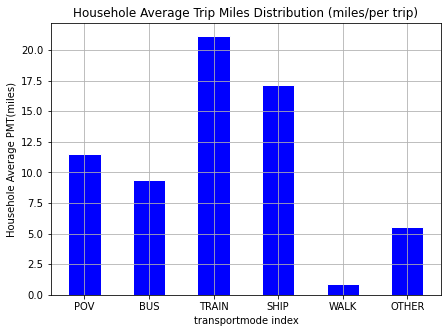

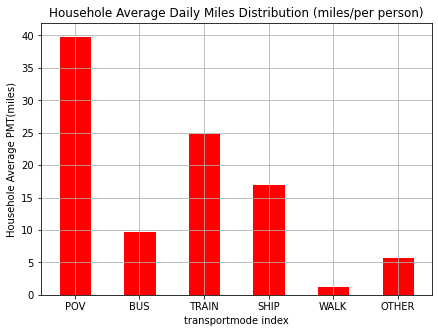

In [27]:
#每次出行的家庭人均里程(miles/人次)分布图-删掉了AIR trip
avgpmtnota=avgpmt.drop(labels=1) 
plt.figure(figsize=(7,5))
plt.title('Househole Average Trip Miles Distribution (miles/per trip)')
plt.xlabel('transportmode index')
plt.ylabel('Househole Average PMT(miles)')
plt.grid()
plt.bar(avgpmtnota['TRANSMODE'], avgpmtnota['AVGHHPMT'], facecolor='b', edgecolor='white',width=0.5)

#每日的家庭人均出行总里程(miles/人)分布图-删掉了AIR trip
avgpmtnota=avgpmt.drop(labels=1) 
plt.figure(figsize=(7,5))
plt.title('Househole Average Daily Miles Distribution (miles/per person)')
plt.xlabel('transportmode index')
plt.ylabel('Househole Average PMT(miles)')
plt.grid()
plt.bar(avgpmtnota['TRANSMODE'], avgpmtnota['AVGHTPMT'], facecolor='r', edgecolor='white',width=0.5)

# Highlights of the 2001NHTS

Report - Highlights of the 2001 National Household Travel Survey

This report is divided into three main areas:
- travel-related characteristics of households and individuals in the United States;
- characteristics of daily trips taken in the nation;
- characteristics of long-distance trips made domestically (and to other countries).

## travel-related

       HHSIZE  HHVEHCNT  WTHHFIN  EXPFLLHH  WTHHNTL  EXPFLHHN
0           2         3 10455.93   9727.41  5763.92   9396.67
1           1         1  3360.30   3355.58  4136.49   4008.28
2           1         2  2270.98   2227.53  2193.10   2115.27
3           2         3  3633.47   3955.17  3285.45   4075.48
4           2         1  2066.72   2462.81  2057.42   2431.45
...       ...       ...      ...       ...      ...       ...
69812       1         2    49.10     44.89      NaN       NaN
69813       2         2   391.02    423.46      NaN       NaN
69814       2         1   246.91       NaN      NaN       NaN
69815       2         4    15.66     17.84      NaN       NaN
69816      11         4   740.85    907.81      NaN       NaN

[69817 rows x 6 columns]
    HHSIZE  AVGHHVEH
0        1      1.07
1        2      2.05
2        3      2.42
3        4      2.49
4        5      2.55
5        6      2.63
6        7      2.73
7        8      2.87
8        9      2.59
9       10      3.45

<BarContainer object of 13 artists>

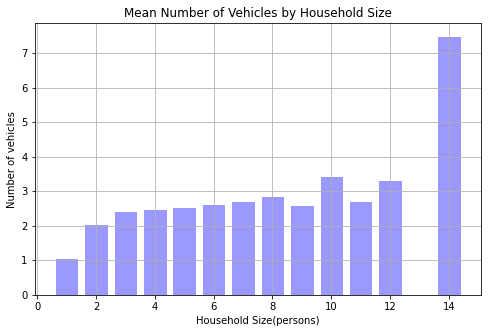

In [28]:
# Mean Number of Vehicles by Household Size
print(HHdata[['HHSIZE', 'HHVEHCNT','WTHHFIN','EXPFLLHH','WTHHNTL','EXPFLHHN']])
avgveh = HHdata.groupby('HHSIZE')['HHVEHCNT'].mean()
avgveh
#avgveh.index = avgveh.index.droplevel(level=0)
#print(avgveh)
avgveh = pd.DataFrame(avgveh)
avgveh.columns = ['AVGHHVEH']
avgveh = avgveh.reset_index()
print(avgveh)

#分布图
plt.figure(num=1, figsize=(8, 5))
plt.grid()
plt.title('Mean Number of Vehicles by Household Size')
plt.xlabel('Household Size(persons)')
plt.ylabel('Number of vehicles')
plt.bar(avgveh['HHSIZE'],avgveh['AVGHHVEH'],facecolor='#9999ff',edgecolor='white')

In [29]:
#Percent of Households with Zero Vehicles
#print(HHdata[['URBRUR','HHSIZE','HOMETYPE','HOMEOWN','HHINCTTL','HHVEHCNT']]) 
import warnings
warnings.filterwarnings("ignore")

data = {'HH characteristic':['in urban area','in rural area','Single-person','Multiperson','is condominium/apartment','is not condominium/apartment',
                            'Residence is owned','Residence is rented','HHincome of $25,000 or more','HHincome less than $25,000','All households'],
        'Percent of HHs with 0 Veh':[0,0,0,0,0,0,0,0,0,0,0]}
data1 = pd.DataFrame(data)
#print(data1)
df1 = HHdata[['URBRUR','HHSIZE','HOMETYPE','HOMEOWN','HHINCTTL','HHVEHCNT']]
print(df1)

a = 100*(df1[(df1['HHVEHCNT']==0)&(df1['URBRUR']==1)].count()/df1[(df1['URBRUR']==1)].count())
b = 100*(df1[(df1['HHVEHCNT']==0)&(df1['URBRUR']==2)].count()/df1[(df1['URBRUR']==2)].count())
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='in urban area'] = a[0]
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='in rural area'] = b[0]

a = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HHSIZE']==1)].count()/df1[(df1['HHSIZE']==1)].count())
b = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HHSIZE']>=2)].count()/df1[(df1['HHSIZE']>=2)].count())
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='Single-person'] = a[0]
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='Multiperson'] = b[0]

a = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HOMETYPE']==4)].count()/df1[(df1['HOMETYPE']==4)].count())
b = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HOMETYPE']!=4)].count()/df1[(df1['HOMETYPE']!=4)].count())
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='is condominium/apartment'] = a[0]
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='is not condominium/apartment'] = b[0]

a = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HOMEOWN']==1)].count()/df1[(df1['HOMEOWN']==1)].count())
b = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HOMEOWN']==2)].count()/df1[(df1['HOMEOWN']==2)].count())
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='Residence is owned'] = a[0]
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='Residence is rented'] = b[0]

a = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HHINCTTL']>=6)&(df1['HHINCTTL']<=18)].count()/df1[(df1['HHINCTTL']>=6)&(df1['HHINCTTL']<=18)].count())
b = 100*(df1[(df1['HHVEHCNT']==0)&(df1['HHINCTTL']>=1)&(df1['HHINCTTL']<=5)].count()/df1[(df1['HHINCTTL']>1)&(df1['HHINCTTL']<=5)].count())
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='HHincome of $25,000 or more'] = a[0]
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='HHincome less than $25,000'] = b[0]

a = 100*(df1[(df1['HHVEHCNT']==0)].count()/df1.count())
data1['Percent of HHs with 0 Veh'][data1['HH characteristic']=='All households'] = a[0]

print(data1)

       URBRUR  HHSIZE  HOMETYPE  HOMEOWN  HHINCTTL  HHVEHCNT
0           1       2         3        1        18         3
1           1       1         4        2         4         1
2           2       1         1        1        -7         2
3           1       2         1        1        17         3
4           2       2         5        1         5         1
...       ...     ...       ...      ...       ...       ...
69812       2       1         1        1         5         2
69813       2       2         1        1        14         2
69814       2       2         1        1        13         1
69815       1       2         1        1        18         4
69816       2      11         1        1         9         4

[69817 rows x 6 columns]
               HH characteristic  Percent of HHs with 0 Veh
0                  in urban area                       7.38
1                  in rural area                       2.28
2                  Single-person                      16.37
3 

,VEHTYPE,unweighted number,weighted number,%,type
0,-8,64.00,106812.83,0.05,Refused
1,-7,50.00,60760.97,0.04,Dont Know
2,1,76526.00,114527932.39,54.90,Car/station wagon
3,2,13885.00,18246715.28,9.96,Van
4,3,16937.00,24291423.96,12.15,Sports utility vehicle
5,4,25572.00,37341439.23,18.35,Pickup truck
6,5,587.00,996359.55,0.42,Other truck
7,6,958.00,1400451.64,0.69,RV(recreational vehicle)
8,7,4011.00,4503599.92,2.88,Motorcycle
9,91,792.00,1110704.54,0.57,Other


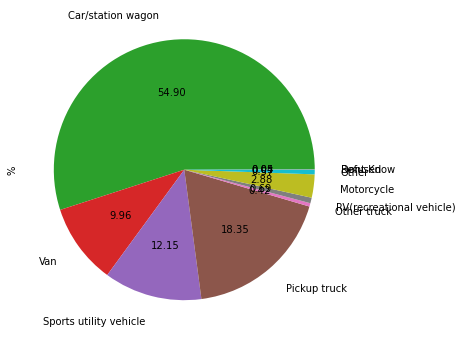

In [30]:
#Proportion of Vehicles by Type
df1 = VEHdata.groupby('VEHTYPE')['VHCASEID'].count() 
df2 = VEHdata.groupby('VEHTYPE')['WTHHFIN'].sum() 

df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df = pd.concat([df1, df2], axis=1)
#print(df)
df.columns = ['unweighted number','weighted number']
df = df.reset_index()
df['%'] = np.nan
df['type'] = ['Refused','Dont Know','Car/station wagon','Van','Sports utility vehicle',
              'Pickup truck','Other truck','RV(recreational vehicle)','Motorcycle','Other']
df = df.append([{'VEHTYPE':'Total'}], ignore_index=True) #新增一行计算总数
df.iloc[10,1] = df['unweighted number'].sum()
df.iloc[10,2] = df['weighted number'].sum()
df['%'] = 100*(df['unweighted number']/df.iloc[10,1])

df3 = df[:10]['%']
plot = df3.plot.pie(labels=['Refused','Dont Know','Car/station wagon','Van','Sports utility vehicle',
              'Pickup truck','Other truck','RV(recreational vehicle)','Motorcycle','Other'],
             autopct='%.2f',figsize=(6,6),labeldistance=1.2 )
df #Proportion of Vehicles by Type

In [31]:
#Mode of Transportation Used to Commute to Work in the Past Week
a = DAYdata[['TDCASEID','TRPTRANS']].groupby('TRPTRANS').count()
a = pd.DataFrame(a)
a.columns = ['trip number']
a = a.reset_index()
b = DAYdata['TDCASEID'].count()
c = 100*(a/b)
data = {'Transportation mode':['POV','AIR','BUS','TRAIN','SHIP','WALK','OTHER','UNCERTAIN'],
        'No. of Trips':np.nan, '%':np.nan}
df = pd.DataFrame(data)
#df[df.loc['col_name'] == 'condition', 'col_name'] = value_1
df.iloc[7,1] = a.iloc[0,1]+a.iloc[1,1]+a.iloc[2,1]+a.iloc[3,1] #POV
df.iloc[6,1] = a.iloc[25,1]+a.iloc[26,1]+a.iloc[27,1]+a.iloc[28,1]+a.iloc[30,1] #OTHER
df.iloc[5,1] = a.iloc[29,1] #WALK
df.iloc[4,1] = a.iloc[22,1]+a.iloc[23,1]+a.iloc[24,1] #SHIP
df.iloc[3,1] = a.iloc[18,1]+a.iloc[19,1]+a.iloc[20,1]+a.iloc[21,1] #TRAIN
df.iloc[2,1] = a.iloc[13,1]+a.iloc[14,1]+a.iloc[15,1]+a.iloc[16,1]+a.iloc[17,1] #BUS
df.iloc[1,1] = a.iloc[11,1]+a.iloc[12,1] #AIR
df.iloc[0,1] = a.iloc[4,1]+a.iloc[5,1]+a.iloc[6,1]+a.iloc[7,1]+a.iloc[8,1]+a.iloc[9,1]+a.iloc[10,1] #POV
df['%'] = 100*(df['No. of Trips']/df['No. of Trips'].sum())
df

,Transportation mode,No. of Trips,%
0,POV,560360.00,87.24
1,AIR,601.00,0.09
2,BUS,17533.00,2.73
3,TRAIN,2858.00,0.44
4,SHIP,281.00,0.04
5,WALK,51526.00,8.02
6,OTHER,8242.00,1.28
7,UNCERTAIN,891.00,0.14


    HHINCTTL  avgVEHYEAR
0         -9     1993.54
1         -8     1993.08
2         -7     1993.86
3         -1     1994.33
4          1     1990.01
5          2     1990.54
6          3     1991.16
7          4     1991.55
8          5     1991.92
9          6     1992.48
10         7     1992.35
11         8     1992.80
12         9     1992.86
13        10     1993.29
14        11     1993.65
15        12     1993.81
16        13     1993.69
17        14     1994.14
18        15     1994.28
19        16     1994.38
20        17     1994.70
21        18     1995.22


<BarContainer object of 22 artists>

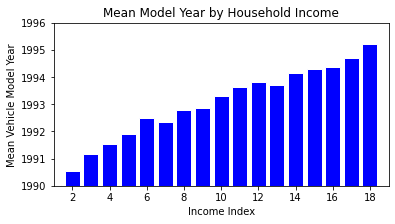

In [32]:
#Mean Model Year by Household Income
VEHdata[['VHCASEID','HHINCTTL','VEHYEAR']]
#删除VEHYEAR的值为-7，-8，-9的行
a=VEHdata[['VHCASEID','HHINCTTL','VEHYEAR']][(VEHdata['VEHYEAR']!=-7)&(VEHdata['VEHYEAR']!=-8)&(VEHdata['VEHYEAR']!=-9)]
a = a.groupby('HHINCTTL')['VEHYEAR'].mean()
df = VEHdata['VEHYEAR'].mean()
a = pd.DataFrame(a)
a.columns = ['avgVEHYEAR']
a = a.reset_index()
print(a)
plt.figure(num=1,figsize=(6,3))
plt.xlim((1, 19))
plt.ylim((1990, 1996))
plt.title('Mean Model Year by Household Income')
plt.xlabel('Income Index')
plt.ylabel('Mean Vehicle Model Year')
plt.bar(a['HHINCTTL'], a['avgVEHYEAR'], facecolor='b', edgecolor='white')

## daily trips

In [33]:
#Total Daily Trips and Total Miles Traveled in Daily Trips
DAYdata['TDCASEID'].count()
print('NATL Total Trips:', DAYdata['WTTRDNTL'][DAYdata['TRPMILES']!=0].sum() ) #Day Trip Wt at least 50% completed-National Level
print('Total Trips:', DAYdata['WTTRDFIN'][DAYdata['TRPMILES']!=0].sum() )      #Day Trip Wt at least 50% completed
print('NATL Total Trips(by POV):', DAYdata['WTTRDNTL'][(DAYdata['TRPTRANS']>=1)&(DAYdata['TRPTRANS']<=7)&(DAYdata['TRPMILES']!=0)].sum() )
print('NATL Total Trips(Car/Van/SUV):', DAYdata['WTTRDNTL'][(DAYdata['TRPTRANS']>=1)&(DAYdata['TRPTRANS']<=3)&(DAYdata['TRPMILES']!=0)].sum() )

#print('Total Miles-NATL:', ((DAYdata['TRPMILES'][DAYdata['TRPMILES']!=0])*(DAYdata['WTTRDNTL'][DAYdata['TRPMILES']!=0])).sum() )
a = DAYdata[DAYdata['TRPMILES']!=0] #not all cases had reported mile values
print('NATL Total Miles:', (a['TRPMILES']*a['WTTRDNTL']).sum() )

b = a[(a['TRPTRANS']>=1)&(a['TRPTRANS']<=7)] #by POV
print('NATL Total Miles(by POV):', (b['TRPMILES']*b['WTTRDNTL']).sum() )

c = a[(a['TRPTRANS']>=1)&(a['TRPTRANS']<=3)] #by Car/Van/SUV
print('NATL Total Miles(Car/Van/SUV):',  (c['TRPMILES']*c['WTTRDNTL']).sum() )
# The total mileage represents daily household-based travel and therefore does not reflect a total of all passenger miles of travel in the United States. 
# It does not include a) vehicle mileage from nondaily long-distance trips, b) noncommuting occupational trips (e.g., taxi cab driving), and c) is also subject to a small amount of nonresponse in trip mileage reporting by survey respondents.

NATL Total Trips: 411233950245.2585
Total Trips: 405329134871.0401
NATL Total Trips(by POV): 355778282756.5974
NATL Total Trips(Car/Van/SUV): 305957620347.02905
NATL Total Miles: 3966916322727.734
NATL Total Miles(by POV): 3507453764016.9727
NATL Total Miles(Car/Van/SUV): 2870473055100.718


     Age range  Mean daily trips
0          0-4              3.06
1         5-14              3.36
2        15-19              3.86
3        20-24              4.00
4        25-54              4.47
5        55-64              4.17
6         >=65              3.54
7  All persons              4.00


<BarContainer object of 8 artists>

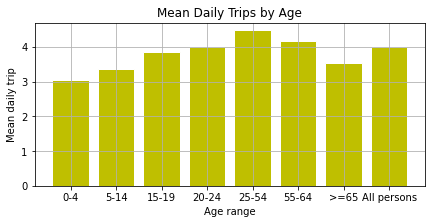

In [34]:
#Mean Daily Trips by Age
data = {'Age range':['0-4','5-14','15-19','20-24','25-54','55-64','>=65','All persons'],
        'Mean daily trips':np.nan}
df = pd.DataFrame(data)
df.iloc[0,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=0)&(PERdata['R_AGEWGT']<=4)].mean()
df.iloc[1,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=5)&(PERdata['R_AGEWGT']<=14)].mean()
df.iloc[2,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=15)&(PERdata['R_AGEWGT']<=19)].mean()
df.iloc[3,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=20)&(PERdata['R_AGEWGT']<=24)].mean()
df.iloc[4,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=25)&(PERdata['R_AGEWGT']<=54)].mean()
df.iloc[5,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=55)&(PERdata['R_AGEWGT']<=64)].mean()
df.iloc[6,1] = PERdata['CNTTDTR'][(PERdata['R_AGEWGT']>=65)].mean()
df.iloc[7,1] = PERdata['CNTTDTR'].mean()
print(df)
plt.figure(num=1,figsize=(7,3))
plt.grid()
plt.title('Mean Daily Trips by Age')
plt.xlabel('Age range')
plt.ylabel('Mean daily trip')
plt.bar(df['Age range'], df['Mean daily trips'], facecolor='y', edgecolor='white')

,Trips Mode,Trips Number,%
0,Personal vehicle (PV),560360,87.24
1,PV-single occupant,261437,40.70
2,PV-multiple occupant,298923,46.54
3,Transit,5989,0.93
4,School bus,11544,1.80
5,Walk,51526,8.02
6,Other,12873,2.00
7,Total,642292,100.00


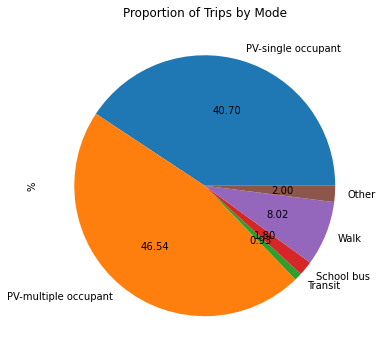

In [35]:
#Proportion of Trips by Mode - daily trip file
a = DAYdata['TDCASEID'].count()
b = DAYdata['TDCASEID'][(DAYdata['TRPTRANS']>=1)&(DAYdata['TRPTRANS']<=7)].count()
c = DAYdata['TDCASEID'][(DAYdata['TRPTRANS']>=1)&(DAYdata['TRPTRANS']<=7)&(DAYdata['NUMONTRP']==1)].count()
d = DAYdata['TDCASEID'][(DAYdata['TRPTRANS']>=1)&(DAYdata['TRPTRANS']<=7)&(DAYdata['NUMONTRP']>1)].count()
e = DAYdata['TDCASEID'][(DAYdata['TRPTRANS']>=10)&(DAYdata['TRPTRANS']<=14)&(DAYdata['TRPTRANS']!=12)].count()
f = DAYdata['TDCASEID'][DAYdata['TRPTRANS']==12].count()
g = DAYdata['TDCASEID'][DAYdata['TRPTRANS']==26].count()
h = DAYdata['TDCASEID'][((DAYdata['TRPTRANS']<1)|((DAYdata['TRPTRANS']>7)&(DAYdata['TRPTRANS']<10))|((DAYdata['TRPTRANS']>14)&(DAYdata['TRPTRANS']!=26)))].count()

data = {'Trips Mode':['Personal vehicle (PV)','PV-single occupant','PV-multiple occupant','Transit','School bus','Walk','Other','Total'],
        'Trips Number':[b,c,d,e,f,g, h,a], 
        '%':[100*(b/a),100*(c/a),100*(d/a),100*(e/a),100*(f/a),100*(g/a),100*(h/a),100*(a/a)]}
df = pd.DataFrame(data)
df2 = df[1:7]['%']
plot = df2.plot.pie(labels=['PV-single occupant','PV-multiple occupant','Transit','School bus','Walk','Other'],
                    autopct='%.2f',figsize=(6,6), title ='Proportion of Trips by Mode' )
df

,WHYTRP1S,TripNum,TripPurpose
0,-9,99,Not Ascertained
1,1,47975,To work
2,2,12957,Work-related
3,3,19425,School
4,4,9925,Religious
5,5,9241,Medical/dental
6,6,82482,Shopping
7,7,62853,Other family & personal
8,8,74317,Social Recreation
9,9,41358,Eat meal


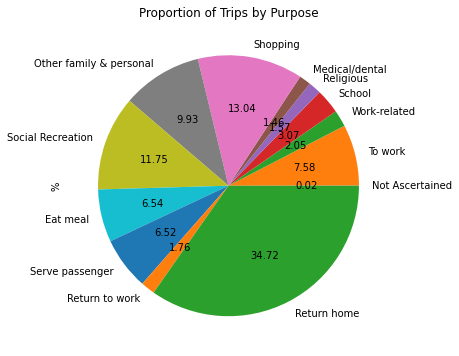

In [36]:
#Proportion of Trips by Purpose - daily trip file
a = DAYdata[['TDCASEID','WHYTRP1S']].groupby('WHYTRP1S').count()
a = pd.DataFrame(a)
a.columns = ['TripNum']
a = a.reset_index()
a['TripPurpose'] = ['Not Ascertained','To work','Work-related','School','Religious',
                    'Medical/dental','Shopping','Other family & personal','Social Recreation',
                    'Eat meal','Serve passenger','Return to work','Return home','Other']
df = a.rename(columns={'TripNum': '%'})
df[0:13]['%'].plot.pie(labels=a['TripPurpose'],autopct='%.2f',figsize=(10,6),title ='Proportion of Trips by Purpose' )
a

,Time of day,Trips Number
0,Midnight-1am,2029.00
1,1-2 am,1017.00
2,2-3 am,731.00
3,3-4 am,400.00
4,4-5 am,2267.00
5,5-6 am,6368.00
6,6-7 am,17326.00
7,7-8 am,41231.00
8,8-9 am,35853.00
9,9-10 am,34007.00


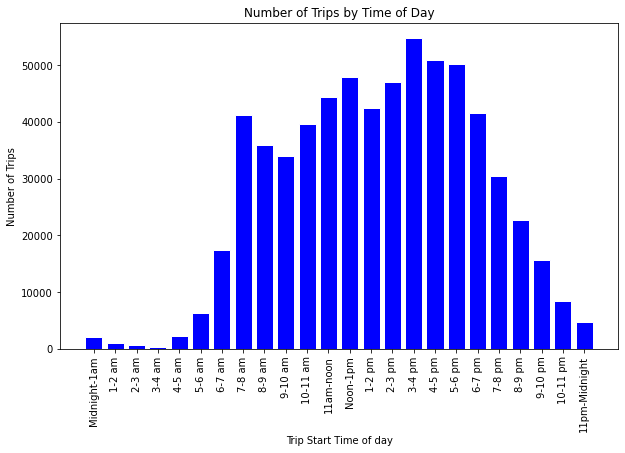

In [37]:
#Percent of Trips by Time of Day 
#这里使用出发时间 STRTTIME (结束时间ENDTIME)
a = DAYdata[['TDCASEID','STRTTIME']][(DAYdata['STRTTIME']>=0)] #删除Not Ascertained的日常出行记录
data = {'Time of day':['Midnight-1am','1-2 am','2-3 am','3-4 am','4-5 am','5-6 am',
                       '6-7 am','7-8 am','8-9 am','9-10 am','10-11 am','11am-noon',
                       'Noon-1pm','1-2 pm','2-3 pm','3-4 pm','4-5 pm','5-6 pm','6-7 pm','7-8 pm',
                       '8-9 pm','9-10 pm','10-11 pm','11pm-Midnight'],
        'Trips Number':np.nan}
TRPST = pd.DataFrame(data)
for i in range(1,25):
    TRPST.iloc[i-1,1] = a['TDCASEID'][(a['STRTTIME']>=100*(i-1))&(a['STRTTIME']<100*i)].count()
#TRPST['Trips Number'].sum()

plt.figure(num=1,figsize=(10,6))
#plt.grid()
plt.title('Number of Trips by Time of Day')
plt.xlabel('Trip Start Time of day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90) 
plt.bar(TRPST['Time of day'], TRPST['Trips Number'], facecolor='b', edgecolor='white')
TRPST

In [38]:
# Mean Occupants by Trip Purpose
a = DAYdata[['TDCASEID','WHYTRP1S','NUMONTRP']].groupby('WHYTRP1S')['NUMONTRP'].mean()
a = pd.DataFrame(a)
a.columns = ['MeanOccupants']
a = a.reset_index()
a['TripPurpose'] = ['Not Ascertained','To work','Work-related','School','Religious',
                    'Medical/dental','Shopping','Other family & personal','Social Recreation',
                    'Eat meal','Serve passenger','Return to work','Return home','Other']
a

,WHYTRP1S,MeanOccupants,TripPurpose
0,-9,2.20,Not Ascertained
1,1,1.15,To work
2,2,1.35,Work-related
3,3,2.85,School
4,4,2.65,Religious
5,5,1.79,Medical/dental
6,6,1.90,Shopping
7,7,1.83,Other family & personal
8,8,2.29,Social Recreation
9,9,2.32,Eat meal


In [39]:
# Mean Minutes and Miles Spent Driving by Driver Age
# select POV Trips
a = DAYdata[['TDCASEID','DRVR_FLG','R_AGEWGT','TRVLCMIN','TRPMILES']][(DAYdata['TRPTRANS']>=1)&(DAYdata['TRPTRANS']<=7)] 
# select Subject was driver on this trip
a = a[a['DRVR_FLG']==1] 
data = {'Driver Age':['15-19','20-24','25-54','55-64','>65','All person(15+)'],
        'Avg Miles':np.nan, 'Avg Minutes':np.nan}
df = pd.DataFrame(data)
# calculate Avg Miles
df.iloc[0,1] = a[(a['R_AGEWGT']>=15)&(a['R_AGEWGT']<=19)]['TRPMILES'].mean()
df.iloc[1,1] = a[(a['R_AGEWGT']>=20)&(a['R_AGEWGT']<=24)]['TRPMILES'].mean()
df.iloc[2,1] = a[(a['R_AGEWGT']>=25)&(a['R_AGEWGT']<=54)]['TRPMILES'].mean()
df.iloc[3,1] = a[(a['R_AGEWGT']>=55)&(a['R_AGEWGT']<=64)]['TRPMILES'].mean()
df.iloc[4,1] = a[(a['R_AGEWGT']>=65)]['TRPMILES'].mean()
df.iloc[5,1] = a[(a['R_AGEWGT']>=15)]['TRPMILES'].mean()
# calculate Avg Minutes
df.iloc[0,2] = a[(a['R_AGEWGT']>=15)&(a['R_AGEWGT']<=19)]['TRVLCMIN'].mean()
df.iloc[1,2] = a[(a['R_AGEWGT']>=20)&(a['R_AGEWGT']<=24)]['TRVLCMIN'].mean()
df.iloc[2,2] = a[(a['R_AGEWGT']>=25)&(a['R_AGEWGT']<=54)]['TRVLCMIN'].mean()
df.iloc[3,2] = a[(a['R_AGEWGT']>=55)&(a['R_AGEWGT']<=64)]['TRVLCMIN'].mean()
df.iloc[4,2] = a[(a['R_AGEWGT']>=65)]['TRVLCMIN'].mean()
df.iloc[5,2] = a[(a['R_AGEWGT']>=15)]['TRVLCMIN'].mean()

df

,Driver Age,Avg Miles,Avg Minutes
0,15-19,7.30,14.92
1,20-24,10.53,18.71
2,25-54,9.69,18.03
3,55-64,9.60,18.89
4,>65,7.35,17.42
5,All person(15+),9.26,17.97


## long-distance trips

,Mode,Female %,Male %
0,Personal vehicle,55.97,44.03
1,Air,57.81,42.19
2,Bus,46.52,53.48
3,Train,58.42,41.58
4,Other,69.03,30.97
5,Total,55.96,44.04


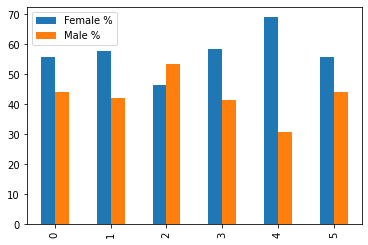

In [40]:
# Long-Distance Trips by Mode and Sex
# R_sex(Male=1; Female=2)
# MAINMODE(POV=1-7; Air=8-9; Bus=10-14; Train=15-17; Ship/cruise=19; Other=91; Not Ascertained=-9)
a = LDTdata[(LDTdata['MAINMODE']>=0)][['TPCASEID','R_SEX','MAINMODE','RETMODE']]
data = {'Mode':['Personal vehicle','Air','Bus','Train','Other','Total'],
        'Female %':np.nan, 'Male %':np.nan}
df = pd.DataFrame(data)

# 按出行方式分组
#POV
m = a[(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()
df.iloc[0,1]=a[(a['R_SEX']==1)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
df.iloc[0,2]=a[(a['R_SEX']==2)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
#AIR
m = a[(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()
df.iloc[1,1]=a[(a['R_SEX']==1)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
df.iloc[1,2]=a[(a['R_SEX']==2)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
#BUS
m = a[(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()
df.iloc[2,1]=a[(a['R_SEX']==1)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
df.iloc[2,2]=a[(a['R_SEX']==2)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
#TRAIN
m = a[(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()
df.iloc[3,1]=a[(a['R_SEX']==1)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
df.iloc[3,2]=a[(a['R_SEX']==2)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
#OTHER
m = a[(a['MAINMODE']>=18)]['TPCASEID'].count()
df.iloc[4,1]=a[(a['R_SEX']==1)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100
df.iloc[4,2]=a[(a['R_SEX']==2)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100
#ALL
m = a['TPCASEID'].count()
df.iloc[5,1]=a[(a['R_SEX']==1)]['TPCASEID'].count()/m*100
df.iloc[5,2]=a[(a['R_SEX']==2)]['TPCASEID'].count()/m*100

df.plot.bar()
df

,Mode,"<$25,000 %","$25,000-49,999 %",">=$50,000 %"
0,POV,92.53,93.40,87.32
1,Air,2.99,3.49,9.90
2,Bus,3.73,2.36,1.59
3,Train,0.31,0.61,0.95
4,Other,0.46,0.15,0.25


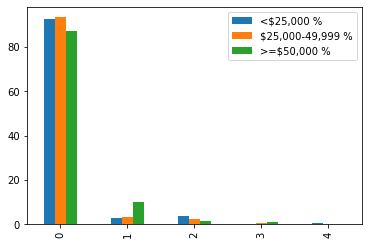

In [41]:
# Proportion of Long-Distance Trips by Mode and Household Income
data = {'Mode':['POV','Air','Bus','Train','Other'],
        '<$25,000 %':np.nan,'$25,000-49,999 %':np.nan,'>=$50,000 %':np.nan}
df = pd.DataFrame(data)
a = LDTdata[(LDTdata['MAINMODE']>=1)][['TPCASEID','HHINCTTL','MAINMODE','RETMODE']]
#HH INCOME<$25,000
m = a[(a['HHINCTTL']>=1)&(a['HHINCTTL']<=5)]['TPCASEID'].count()
df.iloc[0,1] = a[(a['HHINCTTL']>=1)&(a['HHINCTTL']<=5)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
df.iloc[1,1] = a[(a['HHINCTTL']>=1)&(a['HHINCTTL']<=5)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
df.iloc[2,1] = a[(a['HHINCTTL']>=1)&(a['HHINCTTL']<=5)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
df.iloc[3,1] = a[(a['HHINCTTL']>=1)&(a['HHINCTTL']<=5)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
df.iloc[4,1] = a[(a['HHINCTTL']>=1)&(a['HHINCTTL']<=5)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100
#HH INCOME$25,000-49,999
m = a[(a['HHINCTTL']>=6)&(a['HHINCTTL']<=10)]['TPCASEID'].count()
df.iloc[0,2] = a[(a['HHINCTTL']>=6)&(a['HHINCTTL']<=10)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
df.iloc[1,2] = a[(a['HHINCTTL']>=6)&(a['HHINCTTL']<=10)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
df.iloc[2,2] = a[(a['HHINCTTL']>=6)&(a['HHINCTTL']<=10)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
df.iloc[3,2] = a[(a['HHINCTTL']>=6)&(a['HHINCTTL']<=10)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
df.iloc[4,2] = a[(a['HHINCTTL']>=6)&(a['HHINCTTL']<=10)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100
#HH INCOME>=$50,000
m = a[(a['HHINCTTL']>=11)]['TPCASEID'].count()
df.iloc[0,3] = a[(a['HHINCTTL']>=11)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
df.iloc[1,3] = a[(a['HHINCTTL']>=11)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
df.iloc[2,3] = a[(a['HHINCTTL']>=11)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
df.iloc[3,3] = a[(a['HHINCTTL']>=11)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
df.iloc[4,3] = a[(a['HHINCTTL']>=11)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100
df.plot.bar()
df

In [42]:
# Percent of Long-Distance Trips by Mode and Roundtrip Distance
data = {'Mode':['POV','Air','Bus','Train','Other'],
        '100-299 %':np.nan,'300-499 %':np.nan,'500-999 %':np.nan,
        '1000-1999 %':np.nan,'2000+ %':np.nan,'total %':np.nan}
df = pd.DataFrame(data)
a = LDTdata[(LDTdata['MAINMODE']>=1)][['TPCASEID','RTETOT','MAINMODE','RETMODE']]
#Roundtrip Distance:100-299
m = a[(a['RTETOT']>=100)&(a['RTETOT']<=299)]['TPCASEID'].count()
df.iloc[0,1] = a[(a['RTETOT']>=100)&(a['RTETOT']<=299)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
df.iloc[1,1] = a[(a['RTETOT']>=100)&(a['RTETOT']<=299)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
df.iloc[2,1] = a[(a['RTETOT']>=100)&(a['RTETOT']<=299)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
df.iloc[3,1] = a[(a['RTETOT']>=100)&(a['RTETOT']<=299)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
df.iloc[4,1] = a[(a['RTETOT']>=100)&(a['RTETOT']<=299)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100
#剩下四个省略
#Roundtrip Distance:total
m = a[(a['RTETOT']>=0)]['TPCASEID'].count()
df.iloc[0,6] = a[(a['RTETOT']>=0)&(a['MAINMODE']>=1)&(a['MAINMODE']<=7)]['TPCASEID'].count()/m*100
df.iloc[1,6] = a[(a['RTETOT']>=0)&(a['MAINMODE']>=8)&(a['MAINMODE']<=9)]['TPCASEID'].count()/m*100
df.iloc[2,6] = a[(a['RTETOT']>=0)&(a['MAINMODE']>=10)&(a['MAINMODE']<=14)]['TPCASEID'].count()/m*100
df.iloc[3,6] = a[(a['RTETOT']>=0)&(a['MAINMODE']>=15)&(a['MAINMODE']<=17)]['TPCASEID'].count()/m*100
df.iloc[4,6] = a[(a['RTETOT']>=0)&(a['MAINMODE']>=18)]['TPCASEID'].count()/m*100

df

,Mode,100-299 %,300-499 %,500-999 %,1000-1999 %,2000+ %,total %
0,POV,96.97,NaN,NaN,NaN,NaN,89.49
1,Air,0.17,NaN,NaN,NaN,NaN,7.38
2,Bus,1.64,NaN,NaN,NaN,NaN,2.02
3,Train,0.99,NaN,NaN,NaN,NaN,0.87
4,Other,0.23,NaN,NaN,NaN,NaN,0.25


In [43]:
# Proportion of Long-Distance Trips by Purpose
data = {'Purpose':['Business(not commute)','Commute','Pleasure','Personal business','Other'],
        'trips number ':np.nan, '%':np.nan}
df = pd.DataFrame(data)

a = LDTdata[(LDTdata['FARREA21']>=1)][['TPCASEID','FARREA21','COMMUTE']]
m = LDTdata[(LDTdata['FARREA21']>=1)]['TPCASEID'].count()
#Purpose: Business(not commute)
df.iloc[0,1] = a[(a['FARREA21']==1)&(a['COMMUTE']!=1)]['TPCASEID'].count()
df.iloc[0,2] = a[(a['FARREA21']==1)&(a['COMMUTE']!=1)]['TPCASEID'].count()/m*100
#Purpose: Commute
df.iloc[1,1] = a[(a['FARREA21']==1)&(a['COMMUTE']==1)]['TPCASEID'].count()
df.iloc[1,2] = a[(a['FARREA21']==1)&(a['COMMUTE']==1)]['TPCASEID'].count()/m*100
#Purpose: Pleasure
df.iloc[2,1] = a[(a['FARREA21']==2)]['TPCASEID'].count()
df.iloc[2,2] = a[(a['FARREA21']==2)]['TPCASEID'].count()/m*100
#Purpose: Personal business
df.iloc[3,1] = a[(a['FARREA21']==3)]['TPCASEID'].count()
df.iloc[3,2] = a[(a['FARREA21']==3)]['TPCASEID'].count()/m*100
#Purpose: Other
df.iloc[4,1] = a[(a['FARREA21']==4)]['TPCASEID'].count()
df.iloc[4,2] = a[(a['FARREA21']==4)]['TPCASEID'].count()/m*100

df

,Purpose,trips number,%
0,Business(not commute),7510.00,16.65
1,Commute,5229.00,11.59
2,Pleasure,24868.00,55.14
3,Personal business,5981.00,13.26
4,Other,1515.00,3.36


,Destination,LDTrips %,LDMiles %
0,International,1.94,15.29
1,Different region,10.62,34.37
2,"Different state,Different division,Same region",7.10,9.55
3,"Different state,Same division",21.67,15.98
4,Same state,58.67,24.81
5,Total,100.01,100.00


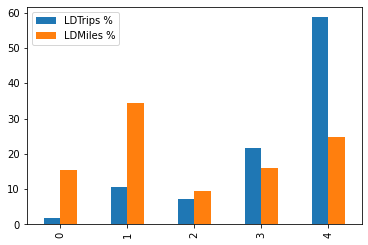

In [44]:
# Percent of Long-Distance Trips and Miles by Destination
LDTdata[['TPCASEID','INT_FLAG','RTETOT','GCDTOT']] 
data = {'Destination':['International','Different region',
                       'Different state,Different division,Same region',
                       'Different state,Same division','Same state','Total'],
       'LDTrips %':np.nan, 'LDMiles %':np.nan}
df = pd.DataFrame(data)

# 1. Percent of Long-Distance Trips by Destination 
m = LDTdata[(LDTdata['INT_FLAG']>=1)]['TPCASEID'].count() #(不考虑International destination flag is Not Ascertained)
df.iloc[0,1] = LDTdata[(LDTdata['INT_FLAG']==1)]['TPCASEID'].count()/m*100 #International
df.iloc[1,1] = LDTdata[(LDTdata['INT_FLAG']==2)&
                       (LDTdata['CENSUS_R']!=LDTdata['FARREG'])]['TPCASEID'].count()/m*100 #Different region
df.iloc[2,1] = LDTdata[(LDTdata['CENSUS_R']==LDTdata['FARREG'])&
                       (LDTdata['CENSUS_D']!=LDTdata['FARDIV'])&
                       (LDTdata['HHSTATE']!=LDTdata['FARST'])]['TPCASEID'].count()/m*100 #Different state,Different division,Same region
df.iloc[3,1] = LDTdata[(LDTdata['CENSUS_D']==LDTdata['FARDIV'])&
                       (LDTdata['HHSTATE']!=LDTdata['FARST'])]['TPCASEID'].count()/m*100 #Different state,Same division
df.iloc[4,1] = LDTdata[(LDTdata['HHSTATE']==LDTdata['FARST'])]['TPCASEID'].count()/m*100 #Same state
df.iloc[5,1] = df['LDTrips %'].sum()


# 2. Percent of Long-Distance Total Miles by Destination 
# RTETOT(Route distance:roundtrip) > GCDTOT(Total trip great circle distance miles) 这里使用RTETOT
n = LDTdata[(LDTdata['INT_FLAG']>=1)]['RTETOT'].sum()
df.iloc[0,2] = LDTdata[(LDTdata['INT_FLAG']==1)]['RTETOT'].sum()/n*100 #International
df.iloc[1,2] = LDTdata[(LDTdata['INT_FLAG']==2)&
                       (LDTdata['CENSUS_R']!=LDTdata['FARREG'])]['RTETOT'].sum()/n*100 #Different region
df.iloc[2,2] = LDTdata[(LDTdata['CENSUS_R']==LDTdata['FARREG'])&
                       (LDTdata['CENSUS_D']!=LDTdata['FARDIV'])&
                       (LDTdata['HHSTATE']!=LDTdata['FARST'])]['RTETOT'].sum()/n*100 #Different state,Different division,Same region
df.iloc[3,2] = LDTdata[(LDTdata['CENSUS_D']==LDTdata['FARDIV'])&
                       (LDTdata['HHSTATE']!=LDTdata['FARST'])]['RTETOT'].sum()/n*100 #Different state,Same division
df.iloc[4,2] = LDTdata[(LDTdata['HHSTATE']==LDTdata['FARST'])]['RTETOT'].sum()/n*100 #Same state
df.iloc[5,2] = df['LDMiles %'].sum()

df[:5].plot.bar()
df

In [45]:
HHdata.describe()

,MSACAT,RAIL,CDIVMSAR,FLGFINCM,DRV_P13,DRV_P14,URBRUR,IMPTHOWN,IMPTHTYP,IMPTPHON,LIF_CYC,INC_P1,TDBOA911,SMPLAREA,SMPLFIRM,SMPLSRCE,DRV_P1,DRV_P2,DRV_P3,DRV_P4,DRV_P5,DRV_P6,DRV_P7,DRV_P8,DRV_P9,DRV_P10,DRV_P11,DRV_P12,WKR_P1,WKR_P2,WKR_P3,WKR_P4,WKR_P5,WKR_P6,WKR_P7,WKR_P8,WKR_P9,WKR_P10,WKR_P11,WKR_P12,WKR_P13,WKR_P14,HHR_HISP,HOMEOWN,HOMETYPE,REL_P1,REL_P2,REL_P3,REL_P4,REL_P5,REL_P6,REL_P7,REL_P8,REL_P9,REL_P10,REL_P11,REL_P12,REL_P13,REL_P14,STAT_P1,STAT_P2,STAT_P3,STAT_P4,STAT_P5,STAT_P6,STAT_P7,STAT_P8,STAT_P9,STAT_P10,STAT_P11,STAT_P12,STAT_P13,STAT_P14,HHR_EDUC,MAILHOME,HHINCTTL,RATIO16V,RATIO16W,RATIOWV,TRAVDAY,LANG,TDAYDATE,HHINTDT,INC_P2,INC_P3,INC_P4,INC_P5,INC_P6,INC_P7,INC_P8,INC_P9,INC_P10,INC_P11,INC_P12,INC_P13,INC_P14,TELTYPE,HHNUMBIK,TELCELL,HHRESP,TELBFM,TELLAND,TELTOTL,HHFAMINC,HHMNINC,HHTOTD,HHR_RACE,HHR_SEX,HHR_STAT,NUMADLT,HHSIZE,SEX_P1,SEX_P2,SEX_P3,SEX_P4,SEX_P5,SEX_P6,SEX_P7,SEX_P8,SEX_P9,SEX_P10,SEX_P11,SEX_P12,SEX_P13,SEX_P14,INCM_P1,INCM_P2,INCM_P3,INCM_P4,INCM_P5,INCM_P6,INCM_P7,AGE_P8,INCM_P8,AGE_P9,INCM_P9,AGE_P10,INCM_P10,AGE_P11,INCM_P11,AGE_P12,INCM_P12,AGE_P13,INCM_P13,AGE_P14,INCM_P14,RESP_CNT,CNTTDHH,CNTTPHH,HHVEHCNT,URBAN,HOMEGEO,MSASIZE,CENSUS_R,CENSUS_D,SUM_STAT,HHR_DRVR,HHR_WRKR,WRKCOUNT,DRVRCNT,EXPFLHHN,WTHHNTL,EXPFLLHH,WTHHFIN,HHR_AGE,AGE_P1,AGE_P2,AGE_P3,AGE_P4,AGE_P5,AGE_P6,AGE_P7,HTPPOPDN,HTHRESDN,HBPPOPDN,HBHRESDN,HBHTNRNT,HTEEMPDN,HTHTNRNT,ENDTRAV,BEGTRAV,MSAPOP
count,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,22178.00,26038.00,60521.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00,69817.00
mean,2.62,1.79,45.21,1.05,-1.00,-1.00,1.25,2.00,2.00,2.00,5.20,1.99,1.68,7.71,1.21,5.16,1.07,0.56,-0.47,-0.76,-0.93,-0.98,-0.99,-1.00,-1.00,-1.00,-1.00,-1.00,1.35,0.71,-0.47,-0.77,-0.93,-0.98,-0.99,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.94,1.31,1.95,1.00,1.84,0.68,0.00,-0.61,-0.87,-0.96,-0.98,-0.99,-1.00,-1.00,-1.00,-1.00,-1.00,1.13,1.30,0.25,-0.23,-0.70,-0.91,-0.97,-0.99,-0.99,-1.00,-1.00,-1.00,-1.00,-1.00,3.71,0.91,8.61,1.00,1.02,0.65,3.94,1.01,200145.06,200142.29,1.45,0.55,0.19,-0.15,-0.29,-0.34,-0.35,-0.36,-0.36,-0.36,-0.36,-0.36,-0.36,1.08,1.02,0.90,1.00,0.14,1.24,2.14,8.46,0.07,13.03,1.55,1.60,1.10,1.86,2.52,1.60,0.89,-0.04,-0.43,-0.78,-0.93,-0.98,-0.99,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.94,-0.93,-0.95,-0.99,-1.00,-1.00,-1.00,-0.96,-1.00,-0.99,-1.00,-0.99,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2.30,9.20,0.02,2.00,2.37,1.19,3.69,2.26,4.26,1.14,1.07,1.36,1.34,1.80,4841.22,4123.54

# A look into the travel patterns of older Americans

Demetra V. Collia, Joy Sharp, Lee Giesbrecht, Journal of Safety Research, 34 (2003), 461-470.

In [46]:
# import pandas as pd
# import numpy as np
# import warnings
# from copy import deepcopy 
# warnings.filterwarnings("ignore")
# pd.set_option('display.max_columns',None) #显示Dateframe所有列(参数设置为None代表显示所有行，也可以自行设置数字)
# #pd.set_option('display.max_rows',None) #显示Dateframe所有行
# # read from
# HHdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\HHPUB.csv')
# PERdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\PERPUB.csv')
# VEHdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\VEHPUB.csv')
# DAYdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\DAYPUB.csv')
# LDTdata = pd.read_csv('.\\Dataset\\Survey data-Ascii\\LDTPUB.csv')
# HH50WT = pd.read_csv('.\\Dataset\\replicate weights_ascii\\hh50wt.csv')
# LDT50WT = pd.read_csv('.\\Dataset\\replicate weights_ascii\\ldt50wt.csv')
# PR50WT = pd.read_csv('.\\Dataset\\replicate weights_ascii\\pr50wt.csv')
# VEHdata_wt = pd.merge(VEHdata,HH50WT,left_on ='HOUSEID', right_on='ID9',how='left')
# DAYdata_wt = pd.merge(DAYdata,PR50WT,left_on=['HOUSEID','PERSONID'],right_on=['ID9','PERSONID'],how='left')
# LDTdata_wt = pd.merge(LDTdata,LDT50WT,left_on=['HOUSEID','PERSONID'],right_on=['HOUSEID','PERSONID'],how='left')

## Introduction
To produce national estimates from the 2001 NHTS data, the sample data were weighted. Weighting the data adjusts for selection probabilities at the household level and adjusts for household and individual nonresponse. Trip weights also include a factor for annualizing both the daily and long-distance trips. **All estimates in this report are weighted.**   
In addition to properly weighting the responses, special procedures for estimating the statistical significance of the estimates were employed because the data were collected using a complex sample design. Comparisons made in the text were tested for statistical significance to ensure that the differences are larger than might be expected due to sampling variation. Testing for statistical significance was done using a **two-sided test**. All differences described in the text were found to be **statistically significant at a 0.05 alpha level**.

## Travel-related characteristics
Older adults are defined to be individuals who are at least 65 years old.  
Younger adults are individuals between the ages of 19 and 64.

In [47]:
#Table1: Annualized daily and long distance trips (Numbers rounded to the nearest million.)
data = {'age group':['0-18','19-64','65+','total'], 
        'num of DT':np.nan, 'SE1':np.nan, 'percent of DT':np.nan, 'SE2':np.nan, 
        'num of LDT':np.nan, 'SE3':np.nan, 'percent of LDT':np.nan, 'SE4':np.nan }
df1 = pd.DataFrame(data)
df1.iloc[0,1]=DAYdata['WTTRDFIN'][(DAYdata['R_AGEWGT']>=0)&(DAYdata['R_AGEWGT']<=18)].sum()/1000000
df1.iloc[1,1]=DAYdata['WTTRDFIN'][(DAYdata['R_AGEWGT']>=19)&(DAYdata['R_AGEWGT']<=64)].sum()/1000000
df1.iloc[2,1]=DAYdata['WTTRDFIN'][DAYdata['R_AGEWGT']>=65].sum()/1000000
df1.iloc[3,1]=DAYdata['WTTRDFIN'].sum()/1000000
df1.iloc[0,3]=df1.iloc[0,1]/df1.iloc[3,1]*100
df1.iloc[1,3]=df1.iloc[1,1]/df1.iloc[3,1]*100
df1.iloc[2,3]=df1.iloc[2,1]/df1.iloc[3,1]*100
df1.iloc[3,3]=df1.iloc[3,1]/df1.iloc[3,1]*100


df1.iloc[0,5]=LDTdata['WTPTPFIN'][(LDTdata['R_AGEWGT']>=0)&(LDTdata['R_AGEWGT']<=18)].sum()/1000000
df1.iloc[1,5]=LDTdata['WTPTPFIN'][(LDTdata['R_AGEWGT']>=19)&(LDTdata['R_AGEWGT']<=64)].sum()/1000000
df1.iloc[2,5]=LDTdata['WTPTPFIN'][LDTdata['R_AGEWGT']>=65].sum()/1000000
df1.iloc[3,5]=LDTdata['WTPTPFIN'].sum()/1000000
df1.iloc[0,7]=df1.iloc[0,5]/df1.iloc[3,5]*100
df1.iloc[1,7]=df1.iloc[1,5]/df1.iloc[3,5]*100
df1.iloc[2,7]=df1.iloc[2,5]/df1.iloc[3,5]*100
df1.iloc[3,7]=df1.iloc[3,5]/df1.iloc[3,5]*100

x, rep,se,n_index = 0, {}, {}, {}
n_index[0] = DAYdata_wt['WTTRDFIN_x'][(DAYdata_wt['R_AGEWGT']>=0)&(DAYdata_wt['R_AGEWGT']<=18)].index #符合条件的index 
n_index[1] = DAYdata_wt['WTTRDFIN_x'][(DAYdata_wt['R_AGEWGT']>=19)&(DAYdata_wt['R_AGEWGT']<=64)].index 
n_index[2] = DAYdata_wt['WTTRDFIN_x'][DAYdata_wt['R_AGEWGT']>=65].index 
n_index[3] = DAYdata_wt['WTTRDFIN_x'].index 
for j in range(4):
    x = DAYdata_wt.iloc[n_index[j]]['WTTRDFIN_y'].sum()
    b = 0
    for i in range(252,351):
        rep[i-252] = DAYdata_wt.iloc[n_index[j],i].sum()
        b += (rep[i-252]-x)**2
    df1.iloc[j,2] = (98/99*b)**0.5/1000000
for j in range(3):
    x = DAYdata_wt.iloc[n_index[j]]['WTTRDFIN_y'].sum()/DAYdata_wt.iloc[n_index[3]]['WTTRDFIN_y'].sum() *100
    b = 0
    for i in range(252,351):
        rep[i-252] = DAYdata_wt.iloc[n_index[j],i].sum()/DAYdata_wt.iloc[n_index[3],i].sum()*100
        b += (rep[i-252]-x)**2
    df1.iloc[j,4] = (98/99*b)**0.5

x, rep, se, n_index = 0, {}, {}, {}
n_index[0] = LDTdata_wt['WTPTPFIN_x'][(LDTdata_wt['R_AGEWGT']>=0)&(LDTdata_wt['R_AGEWGT']<=18)].index #符合条件的index 
n_index[1] = LDTdata_wt['WTPTPFIN_x'][(LDTdata_wt['R_AGEWGT']>=19)&(LDTdata_wt['R_AGEWGT']<=64)].index 
n_index[2] = LDTdata_wt['WTPTPFIN_x'][LDTdata_wt['R_AGEWGT']>=65].index 
n_index[3] = LDTdata_wt['WTPTPFIN_x'].index 
for j in range(4):
    b=0
    x = LDTdata_wt.iloc[n_index[j]]['WTPTPFIN_y'].sum()
    for i in range(138,237):
        rep[i-138] = LDTdata_wt.iloc[n_index[j],i].sum()
        b += (rep[i-138]-x)**2
    df1.iloc[j,6] = (98/99*b)**0.5/1000000
for j in range(3):
    b=0
    x = LDTdata_wt.iloc[n_index[j]]['WTPTPFIN_y'].sum()/LDTdata_wt.iloc[n_index[3]]['WTPTPFIN_y'].sum()*100
    for i in range(138,237):
        rep[i-138] = LDTdata_wt.iloc[n_index[j],i].sum()/LDTdata_wt.iloc[n_index[3],i].sum()*100
        b += (rep[i-138]-x)**2
    df1.iloc[j,8] = (98/99*b)**0.5

df1.round(2)
#DAYdata_wt[['WTTRDNTL','WTTRDFIN_x']]

,age group,num of DT,SE1,percent of DT,SE2,num of LDT,SE3,percent of LDT,SE4
0,0-18,97659.97,814.30,23.98,0.14,488.93,11.93,18.68,0.38
1,19-64,267874.54,1016.05,65.77,0.16,1902.17,31.47,72.68,0.44
2,65+,41727.97,501.59,10.25,0.12,226.03,6.66,8.64,0.25
3,total,407262.49,1633.64,100.00,NaN,2617.13,37.73,100.00,NaN


In [48]:
#Table6: Mean number of trips by age and sex
data = {'age and sex':['male(19-64)','female(19-64)','all(19-64)','male(>=65)','female(>=65)','all(>=65)'],
        'avgnum of DT':np.nan, 'SE1':np.nan, 'avgnum of LDT':np.nan, 'SE2':np.nan}
df2 = pd.DataFrame(data)
rep, n_index = {}, {}
for k in ['CNTTDTR', 'CNTTPTR']:
    n_index[0] = PERdata['WTPERFIN'][(PERdata[k]>=0)&(PERdata['R_AGEWGT']>=19)&(PERdata['R_AGEWGT']<=64)&(PERdata['R_SEX']==1)].index
    n_index[1] = PERdata['WTPERFIN'][(PERdata[k]>=0)&(PERdata['R_AGEWGT']>=19)&(PERdata['R_AGEWGT']<=64)&(PERdata['R_SEX']==2)].index
    n_index[2] = PERdata['WTPERFIN'][(PERdata[k]>=0)&(PERdata['R_AGEWGT']>=19)&(PERdata['R_AGEWGT']<=64)].index
    n_index[3] = PERdata['WTPERFIN'][(PERdata[k]>=0)&(PERdata['R_AGEWGT']>=65)&(PERdata['R_SEX']==1)].index
    n_index[4] = PERdata['WTPERFIN'][(PERdata[k]>=0)&(PERdata['R_AGEWGT']>=65)&(PERdata['R_SEX']==2)].index
    n_index[5] = PERdata['WTPERFIN'][(PERdata[k]>=0)&(PERdata['R_AGEWGT']>=65)].index
    for j in range(6):
        x1 = PR50WT.iloc[n_index[j]]['WTPERFIN'].sum() #weighted person count
        x2 =(PR50WT.iloc[n_index[j]]['WTPERFIN']*PERdata.iloc[n_index[j]][k]).sum() #weighted trip count
        b = 0
        for i in range(3,102):
            rep[i-3]=((PR50WT.iloc[n_index[j],i]*PERdata.iloc[n_index[j]][k]).sum())/(PR50WT.iloc[n_index[j],i].sum())
            b += (rep[i-3]-x2/x1)**2
        if k=='CNTTDTR':
            df2.iloc[j,1] = x2/x1
            df2.iloc[j,2] = (98/99*b)**0.5
        else:
            df2.iloc[j,3] = x2/x1
            df2.iloc[j,4] = (98/99*b)**0.5
df2.round(2)

,age and sex,avgnum of DT,SE1,avgnum of LDT,SE2
0,male(19-64),4.31,0.02,1.04,0.02
1,female(19-64),4.49,0.02,0.71,0.01
2,all(19-64),4.40,0.02,0.87,0.01
3,male(>=65),3.83,0.05,0.66,0.03
4,female(>=65),3.12,0.05,0.42,0.01
5,all(>=65),3.42,0.04,0.52,0.02


##  Daily trips characteristics
A daily trip is one that occurred on the randomly selected travel day regardless of mode or distance traveled, so long as the person went from one address to another.   
1. Who is traveling?   
2. How do they travel?  
3. Why do they travel?  
4. When do they travel?  
5. Older adults with self-reported medical condition(s)that impact their ability to travel.

## Long-distance travel characteristics
Long-distance trips in the 2001 NHTS are defined as trips of **50 miles or more** from home to the farthest destination traveled.  
For a long-distance trip, this includes both the portion of the trip to reach the farthest destination, as well as the return trip home and any overnight stops made along the way or stops to change transportation modes.
1. Who is traveling?
2. How are they traveling on long-distance trips?
3. Why are they traveling long distances?
4. Where do they travel?

# 出行数据

## 预处理

In [49]:
PERdata#[['HOUSEID','PERSONID','CNTTDTR']].head(20)

,HOUSEID,PRCASEID,PERSONID,MSACAT,RAIL,CDIVMSAR,INDVINC,URBRUR,HBHUR,HTHUR,IMPTAGE,IMPTSEX,IMPTRACE,IMPTHOWN,IMPTHTYP,FLGPRDRV,WORKGEO,CONDRIVE,GT1JBLWK,CONDNIGH,AGERANGE,BORNINUS,CONDPUB,CONDRIDE,CONDSPEC,CONDTRAV,DIARYCMP,DTACDT,DTCONJ,DTDISTRC,DTDRUNK,DTGAS,DTRRAGE,DTSPEED,DTTIEUP,DTTRUCKS,EDUC,FRSTHM,MEDCOND,MEDCOND6,OCCAT,OUTOFTWN,OUTCNTRY,PAYPROF,PROXY,PTUSED,USULDRV,WEBACC,WEBHOME,WEBOTHER,WEBUSE,WEBWORK,WKFMHM2M,WKFMHMXX,WKFTPT,WRKDRIVE,WRKTRANS,WRKTRPS,WHERBORN,USEPUBTR,YRMLCAT,PROXCAT,TRAVDAY,TDBOA911,SMPLAREA,SMPLFIRM,SMPLSRCE,HHR_HISP,HOMEOWN,HOMETYPE,HHR_EDUC,LANG,TDAYDATE,HHRESP,HHFAMINC,HHR_RACE,NUMADLT,HHSIZE,HHVEHCNT,URBAN,MSASIZE,CENSUS_R,CENSUS_D,HHR_DRVR,HHR_WRKR,WRKCOUNT,WKSTFIPS,GCDWORK,R_RELAT,R_SEX,CNTTDTR,DTNOWALK,DTPVPOT,YRMLCAP,NWALKTRP,NBIKETRP,YEARMILE,COMMDRVR,WEBWHER,WORKLOC,DISTTOWK,WORKSTAT,TIMETOWK,CARRODE,DISTBLOC,DIFFDATE,CNTTPTR,CNTTPUNQ,PRMDRVR1,PRMDRVR2,PRMDRVR3,DRIVER,WORKER,EXPFLPRN,WTPRNTL,HHINCTTL,SAMEPLC,LASTRPMM,LASTRPYY,LSTTRDT,LSTTRDAY,R_AGEWGT,WTPERFIN,EXPFLLPR,HHSTATE,HHSTFIPS,HHC_MSA,R_AGE,YRTOUS,HTPPOPDN,HTHRESDN,HBPPOPDN,HBHRESDN,HBHTNRNT,HTEEMPDN,HTHTNRNT,PRMACT,ENDTRAV,BEGTRAV,LIF_CYC,DRVRCNT,MSAPOP
0,10000018,1000001801,1,1,1,51,-1,1,S,S,2,2,2,2,2,2,-1,-1,2,-1,-1,1,-1,-1,-1,-1,1,3,3,-1,-1,4,-1,3,-1,-1,2,1,2,-1,4,-1,-1,-1,1,5,1,1,1,1,1,1,1,2,1,2,1,-1,-1,2,-1,5,1,1,10,1,1,2,1,3,2,1,200105,1,18,1,2,2,3,2,5,3,5,1,1,2,51,-1.00,1,2,5,-1,2,2,3,2,16000,2,7,-8,11.00,VA,45,-1,-1,1,0,0,1,-1,-1,1,1,13842.94,9262.48,18,-1,-1,-1,-1,-1,26,12188.44,15923.19,VA,51,8872,26,-1,3000,2000,7000,4000,60,3000,60,1,200105,200104,2,2,7608070
1,10000018,1000001802,2,1,1,51,-1,1,S,S,2,2,2,2,2,2,1,-1,2,-1,-1,2,-1,-1,-1,-1,1,2,1,-1,-1,-9,3,-9,-1,-1,2,1,2,-1,4,-1,-1,-1,1,5,1,1,1,2,4,2,2,-1,1,2,1,-1,8,2,-1,5,1,1,10,1,1,2,1,3,2,1,200105,1,18,1,2,2,3,2,5,3,5,1,1,2,51,3.00,2,1,5,1,2,2,2,2,14000,2,1,1,5.00,VA,10,-1,-1,1,0,0,2,-1,-1,1,1,15765.61,10429.00,18,-1,-1,-1,-1,-1,27,13963.87,18209.94,VA,51,8872,27,1991,3000,2000,7000,4000,60,3000,60,1,200105,200104,2,2,7608070
2,10000045,1000004501,1,2,2,52,-1,1,S,S,2,2,2,2,2,2,1,-1,2,-1,-1,1,-1,-1,-1,-1,1,5,5,-1,-1,5,-1,4,-1,-1,5,1,2,-1,1,-1,-1,-1,1,3,1,2,-1,-1,-1,-1,2,-1,1,1,1,1,-1,2,-1,5,3,1,10,1,1,2,2,4,5,1,200104,1,4,1,1,1,1,2,4,3,5,1,1,1,12,2.00,1,1,5,-1,2,2,20,0,20000,1,8,1,6.00,FL,15,-1,-1,1,0,0,1,-1,-1,1,1,1843.76,2077.80,4,-1,-1,-1,-1,-1,55,1849.71,1656.68,FL,12,8280,55,-1,3000,2000,7000,2000,30,1500,30,1,200104,200103,1,1,2395997
3,10000474,1000047401,1,4,2,54,-1,2,R,R,2,2,2,2,2,3,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,5,5,-1,5,-9,-1,-9,1,-1,1,1,2,-1,-1,-1,-1,2,1,5,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,5,2,1,10,1,1,2,1,1,1,1,200104,1,-7,1,1,1,2,4,6,3,5,1,2,0,-1,-1.00,1,2,7,-1,2,2,0,0,5000,-1,8,-1,-9.00,-1,-1,-1,-9,1,0,0,1,2,-1,1,2,1881.01,1969.17,-7,-1,-1,-1,-1,-1,80,2058.65,1967.86,GA,13,9999,80,-1,300,150,50,25,20,75,30,4,200104,200103,1,1,-1
4,10000577,1000057701,1,1,1,21,-1,1,T,T,2,2,2,2,2,2,6,-1,2,-1,-1,1,-1,-1,-1,-1,2,-1,4,-1,-1,2,2,-1,-1,-1,6,1,2,-1,3,-1,-1,-1,1,5,1,1,1,2,2,1,2,-1,1,2,4,-1,-1,2,-1,5,4,2,10,1,1,2,1,1,6,1,200112,1,17,1,2,2,3,2,5,1,2,1,1,2,34,-9.00,1,1,3,1,2,2,5,0,10000,2,4,-8,46.00,NJ,65,-1,-1,3,2,1,1,-1,-1,1,1,6278.19,6236.91,17,-1,-1,-1,-1,-1,37,5322.02,5229.74,PA,42,6162,37,-1,300,150,750,150,20,150,5,1,200112,200111,2,2,6188463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160753,915637259,91563725902,2,4,2,34,-1,2,R,R,2,2,2,2,2,2,1,-1,2,-1,-1,1,-1,-1,-1,-1,2,-1,3,-1,-1,3,2,-1,-1,-1,4,1,2,-1,4,-1,-1,-1,1,5,-1,1,1,1,1,

In [50]:
DAYdata#.head(20)

,HOUSEID,PERSONID,TDCASEID,TDTRPNUM,MSACAT,RAIL,CDIVMSAR,TRPTRANS,TRPPUB,PSGR_FLG,DRVR_FLG,VEHUSED,WHODROVE,TRPHHVEH,HHMEMDRV,URBRUR,WHYFROM,HTHUR,HBHUR,IMPTAGE,IMPTSEX,IMPTRACE,IMPTMILE,IMPTMIN,IMPTHOWN,IMPTHTYP,IMPTENTM,IMPTSTTM,IMPTTPUB,IMPTTRIP,TDMSDTRP,TPOVRLAP,AWAYHOME,DRIVER,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,PASSPURP,PUBTYPE,R_RELAT,TRACC1,TRACC2,TRACC3,TRACC4,TRACC5,TREGR1,TREGR2,TREGR3,TREGR4,TREGR5,WORKER,TRPHHACC,WHYTO,TDWKND,ONTD_P13,ONTD_P14,WHYTRP1S,STRTTIME,TRPDIST,ENDHOUR,TRACCTM,TRWAITTM,TRPBLKS,EDUC,OUTOFTWN,PROXY,PROXCAT,HHR_HISP,HHR_RACE,HHR_DRVR,HHR_WRKR,R_SEX,TRAVDAY,TDAYDATE,TDBOA911,SMPLAREA,SMPLFIRM,SMPLSRCE,HOMEOWN,HOMETYPE,HHR_EDUC,LANG,HHRESP,HHFAMINC,HHSIZE,URBAN,MSASIZE,CENSUS_R,CENSUS_D,HH_ONTD,NUMONTRP,DWELTIME,EDITMODE,EDITPURP,EDITSTTM,EDITENTM,EDITMILE,EDITMIN,FLGNXTDY,STRTHR,STRTMIN,ENDMIN,WHYTRP90,TRVL_MIN,WHYTRP01,TRVLCMIN,HHINCTTL,TRPNUMSQ,WTTRDNTL,EXPFLTDN,WTTRDFIN,EXPFLLTD,NONHHCNT,TRPMILES,TREGRTM,HHSTATE,HHSTFIPS,HHC_MSA,ENDTIME,VEHID,HTPPOPDN,HTHRESDN,HBPPOPDN,HBHRESDN,HBHTNRNT,HTEEMPDN,HTHTNRNT,VEHTYPE,PRMACT,R_AGEWGT,TRIPPURP,ENDTRAV,BEGTRAV,OCCAT,NUMADLT,HHVEHCNT,WRKCOUNT,R_AGE,LIF_CYC,DRVRCNT,MSAPOP
0,10000018,1,100000180101,1,1,1,51,26,-1,-1,-1,-1,-1,-1,-1,1,1,S,S,2,2,2,2,2,2,2,2,2,2,2,2,2,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,82,1,-1,-1,9,830,5,8,-1,-1,5,2,-1,1,5,2,1,1,1,2,1,200105,1,10,1,1,1,3,2,1,1,18,2,2,5,3,5,2,2,45,2,2,2,2,2,2,2,8,30,45,10,15,82,15,18,1,3380803.96,5052672.70,4448782.18,5811965.16,0,0.56,-1,VA,51,8872,845,-1,3000,2000,7000,4000,60,3000,60,-1,1,26,2,200105,200104,4,2,3,2,26,2,2,7608070
1,10000018,1,100000180102,2,1,1,51,26,-1,-1,-1,-1,-1,-1,-1,1,82,S,S,2,2,2,2,2,2,2,2,2,2,2,2,2,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,12,930,5,9,-1,-1,5,2,-1,1,5,2,1,1,1,2,1,200105,1,10,1,1,1,3,2,1,1,18,2,2,5,3,5,2,2,495,2,2,2,2,2,2,2,9,30,45,10,15,1,15,18,2,3380803.96,5052672.70,4448782.18,5811965.16,0,0.56,-1,VA,51,8872,945,-1,3000,2000,7000,4000,60,3000,60,-1,1,26,2,200105,200104,4,2,3,2,26,2,2,7608070
2,10000018,1,100000180103,3,1,1,51,1,-1,1,2,2,2,1,1,1,1,S,S,2,2,2,2,2,2,2,2,2,2,2,2,2,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,82,1,-1,-1,9,1800,1,18,-1,-1,-1,2,-1,1,5,2,1,1,1,2,1,200105,1,10,1,1,1,3,2,1,1,18,2,2,5,3,5,2,2,43,2,2,2,2,2,2,2,18,0,2,10,2,82,2,18,3,3380803.96,5052672.70,4448782.18,5811965.16,0,1.00,-1,VA,51,8872,1802,2,3000,2000,7000,4000,60,3000,60,1,1,26,2,200105,200104,4,2,3,2,26,2,2,7608070
3,10000018,1,100000180104,4,1,1,51,1,-1,1,2,2,2,1,1,1,82,S,S,2,2,2,2,2,2,2,2,2,2,2,2,2,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,40,1,-1,-1,7,1845,5,19,-1,-1,-1,2,-1,1,5,2,1,1,1,2,1,200105,1,10,1,1,1,3,2,1,1,18,2,2,5,3,5,2,2,0,2,2,2,1,2,2,2,18,45,10,3,45,40,25,18,4,3380803.96,5052672.70,4448782.18,5811965.16,0,5.00,-1,VA,51,8872,1910,2,3000,2000,7000,4000,60,3000,60,1,1,26,5,200105,200104,4,2,3,2,26,2,2,7608070
4,10000018,1,100000180105,5,1,1,51,1,-1,1,2,2,2,1,1,1,40,S,S,2,2,2,2,2,2,2,2,2,2,2,2,2,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,12,1910,5,19,-1,-1,-1,2,-1,1,5,2,1,1,1,2,1,200105,1,10,1,1,1,3,2,1,1,18,2,2,5,3,5,2,2,-1,2,2,1,2,2,2,2,19,10,30,10,-9,1,20,18,5,3380803.96,5052672.70,4448782.18,5811965.16,0,5.00,-1,VA,51,8872,1930,2,3000,2000,7000,4000,60,3000,60,1,1,26,2,200105,200104,4,2,3,2,26,2,2,7608070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [51]:
# #方法1
# #合并 DAYdata 和 PERdata (how='left')
# DAY_PER = pd.merge(DAYdata, PERdata, how='left')
# print(DAY_PER['PRCASEID'].isnull().value_counts()) #person data 内容为空值的行数（有出行无个人数据？） 60326 
# print(DAY_PER['TDCASEID'].isnull().value_counts()) #day trip data 内容为空值的行数（有个人无出行数据？） 0
# DAY_PER #642292条出行记录（但其中含60326条记录无个人数据），包含140918人

# DAY_PER0 = DAY_PER[DAY_PER['PRCASEID'].isnull().values!=True]
# DAY_PER0 = DAY_PER0.reset_index(drop=True)
# print(DAY_PER0.groupby(['HOUSEID','PERSONID'])['TDCASEID'].size()) #记录127402人
# DAY_PER0 #581966条出行记录，包含127402人

In [52]:
# #方法2
# ##合并 DAYdata 和 PERdata (how='outer')
# DAY_PER1 = pd.merge(DAYdata, PERdata, how='outer')
# #DAY_PER1
# DAY_PER1.groupby(['HOUSEID','PERSONID'])['TDCASEID'].count() #组合表 记录的person数量  164593
# print(DAY_PER1['PRCASEID'].isnull().value_counts()) #person data 内容为空值的行数（有出行无个人数据？） 60326 可以删除？
# print(DAY_PER1['TDCASEID'].isnull().value_counts()) #day trip data 内容为空值的行数（有个人无出行数据？） 33356
# DAY_PER1[DAY_PER1['CNTTDTR']==0] #33356行中，有19843行记录的person出行日无出行 (即有19843人出行日无出行)
# #df = DAY_PER1.drop(DAY_PER1[DAY_PER1['CNTTDTR']==0].index) #删除['CNTTDTR']==0的出行记录 但还有13513行的daytrip部分为空值
# #df[df['TDCASEID'].isnull().values==True] #这13513行可能是person记录和day trip记录不匹配的数据，可以删除？
# #即需要删除：有出行无个人数据的60326条 + 有个人无出行（不含出行数=0）数据的13513条 = 73839条出行记录

# #删除以上不匹配数据，剩余601809条记录（包含出行数=0的19843条记录），记录了147245人的出行
# #index=[0,581965]为出行_个人记录，index=[581966,601808]为出行数=0的个人记录
# DAY_PER2 = DAY_PER1[(DAY_PER1['PRCASEID'].isnull().values!=True)&((DAY_PER1['TDCASEID'].isnull().values!=True) | (DAY_PER1['CNTTDTR']==0))]
# DAY_PER2 = DAY_PER2.reset_index(drop=True)
# DAY_PER2.groupby(['HOUSEID','PERSONID'])['TDCASEID'].count()
# #DAY_PER2

# #删除出行数=0的19843条记录，剩余581966条出行_个人记录（不含出行数=0），记录了127402人的出行
# DAY_PER3 = DAY_PER2.drop(DAY_PER2[DAY_PER2['CNTTDTR']==0].index)
# DAY_PER3 = DAY_PER3.reset_index(drop=True)
# DAY_PER3.groupby(['HOUSEID','PERSONID'])['TDCASEID'].size()
# #DAY_PER3

In [53]:
#DAY_PER1 - 675648条记录（全部），包含164593人
DAY_PER1 = pd.merge(DAYdata, PERdata, how='outer')
#DAY_PER2 - 601809条记录（含出行数=0），包含147245人
DAY_PER2 = DAY_PER1[(DAY_PER1['PRCASEID'].isnull().values!=True)&((DAY_PER1['TDCASEID'].isnull().values!=True) | (DAY_PER1['CNTTDTR']==0))].reset_index(drop=True)
#DAY_PER3 - 581966条记录（不含出行数=0），包含127402人，来自58842个家庭
DAY_PER3 = DAY_PER2.drop(DAY_PER2[DAY_PER2['CNTTDTR']==0].index).reset_index(drop=True)

## 案例

In [54]:
case1 = DAY_PER3.sample(10)
case1 = case1.drop_duplicates(subset='HOUSEID', keep='first').reset_index()

In [55]:
case2 = DAY_PER3.sample(50)
case2 = case2.drop_duplicates(subset='HOUSEID', keep='first').reset_index()

In [56]:
case3 = DAY_PER3.sample(5000)
case3 = case3.drop_duplicates(subset='HOUSEID', keep='first').reset_index()
case3

,index,HOUSEID,PERSONID,TDCASEID,TDTRPNUM,MSACAT,RAIL,CDIVMSAR,TRPTRANS,TRPPUB,PSGR_FLG,DRVR_FLG,VEHUSED,WHODROVE,TRPHHVEH,HHMEMDRV,URBRUR,WHYFROM,HTHUR,HBHUR,IMPTAGE,IMPTSEX,IMPTRACE,IMPTMILE,IMPTMIN,IMPTHOWN,IMPTHTYP,IMPTENTM,IMPTSTTM,IMPTTPUB,IMPTTRIP,TDMSDTRP,TPOVRLAP,AWAYHOME,DRIVER,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,PASSPURP,PUBTYPE,R_RELAT,TRACC1,TRACC2,TRACC3,TRACC4,TRACC5,TREGR1,TREGR2,TREGR3,TREGR4,TREGR5,WORKER,TRPHHACC,WHYTO,TDWKND,ONTD_P13,ONTD_P14,WHYTRP1S,STRTTIME,TRPDIST,ENDHOUR,TRACCTM,TRWAITTM,TRPBLKS,EDUC,OUTOFTWN,PROXY,PROXCAT,HHR_HISP,HHR_RACE,HHR_DRVR,HHR_WRKR,R_SEX,TRAVDAY,TDAYDATE,TDBOA911,SMPLAREA,SMPLFIRM,SMPLSRCE,HOMEOWN,HOMETYPE,HHR_EDUC,LANG,HHRESP,HHFAMINC,HHSIZE,URBAN,MSASIZE,CENSUS_R,CENSUS_D,HH_ONTD,NUMONTRP,DWELTIME,EDITMODE,EDITPURP,EDITSTTM,EDITENTM,EDITMILE,EDITMIN,FLGNXTDY,STRTHR,STRTMIN,ENDMIN,WHYTRP90,TRVL_MIN,WHYTRP01,TRVLCMIN,HHINCTTL,TRPNUMSQ,WTTRDNTL,EXPFLTDN,WTTRDFIN,EXPFLLTD,NONHHCNT,TRPMILES,TREGRTM,HHSTATE,HHSTFIPS,HHC_MSA,ENDTIME,VEHID,HTPPOPDN,HTHRESDN,HBPPOPDN,HBHRESDN,HBHTNRNT,HTEEMPDN,HTHTNRNT,VEHTYPE,PRMACT,R_AGEWGT,TRIPPURP,ENDTRAV,BEGTRAV,OCCAT,NUMADLT,HHVEHCNT,WRKCOUNT,R_AGE,LIF_CYC,DRVRCNT,MSAPOP,PRCASEID,INDVINC,FLGPRDRV,WORKGEO,CONDRIVE,GT1JBLWK,CONDNIGH,AGERANGE,BORNINUS,CONDPUB,CONDRIDE,CONDSPEC,CONDTRAV,DIARYCMP,DTACDT,DTCONJ,DTDISTRC,DTDRUNK,DTGAS,DTRRAGE,DTSPEED,DTTIEUP,DTTRUCKS,FRSTHM,MEDCOND,MEDCOND6,OUTCNTRY,PAYPROF,PTUSED,USULDRV,WEBACC,WEBHOME,WEBOTHER,WEBUSE,WEBWORK,WKFMHM2M,WKFMHMXX,WKFTPT,WRKDRIVE,WRKTRANS,WRKTRPS,WHERBORN,USEPUBTR,YRMLCAT,WKSTFIPS,GCDWORK,CNTTDTR,DTNOWALK,DTPVPOT,YRMLCAP,NWALKTRP,NBIKETRP,YEARMILE,COMMDRVR,WEBWHER,WORKLOC,DISTTOWK,WORKSTAT,TIMETOWK,CARRODE,DISTBLOC,DIFFDATE,CNTTPTR,CNTTPUNQ,PRMDRVR1,PRMDRVR2,PRMDRVR3,EXPFLPRN,WTPRNTL,SAMEPLC,LASTRPMM,LASTRPYY,LSTTRDT,LSTTRDAY,WTPERFIN,EXPFLLPR,YRTOUS
0,277803,5M0019240,3,5M00192400304,4.00,4,2,74,3.00,-1.00,1.00,2.00,2.00,2.00,1.00,1.00,1,60.00,C,C,2,2,2,2.00,2.00,2,2,2.00,2.00,2.00,2.00,2.00,-1.00,-1.00,2,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,-1.00,-1.00,3,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2,1.00,1.00,2.00,2.00,-1.00,12.00,1600.00,4.00,16.00,-1.00,-1.00,-1.00,-1,-1,2,1,2,1,1,2,2,2,200205,2,8,2,9,2,1,4,1,1,18,4,1,6,3,7,4.00,4.00,40.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,16.00,0.00,10.00,5.00,10.00,1.00,10.00,18,4.00,NaN,NaN,73129.39,67941.94,0.00,4.00,-1.00,TX,48,9999,1610.00,2.00,750,700,300,150,20,350,40,3.00,-1,10,4.00,-1,-1,-1,2,2,1,10,6,2,-1,5M001924003,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-9.00,2.00,-1.00,-1,-1.00,9.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,NaN,NaN,-1.00,-1.00,-1.00,-1.00,-1.00,200.35,186.14,-1.00
1,580332,915518509,2,9155185090204,4.00,4,2,34,4.00,-1.00,1.00,2.00,1.00,1.00,1.00,1.00,1,41.00,T,T,2,2,2,2.00,2.00,2,2,2.00,2.00,2.00,2.00,2.00,-1.00,-1.00,1,1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,1.00,41.00,2.00,-1.00,-1.00,6.00,1055.00,0.00,10.00,-1.00,-1.00,-1.00,5,-1,1,5,2,1,1,1,2,3,200203,2,9,1,10,1,1,8,1,1,16,2,1,6,2,3,2.00,2.00,64.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,10.00,55.00,58.00,3.00,3.00,41.00,3.00,16,4.00,NaN,NaN,6149.58,6030.43,0.00,0.50,-1.00,WI,55,9999,1058.00,1.00,300,150,300,150,5,150,5,4.00,1,54,5.00,-1,-1,4,2,2,2,54,2,2,-1,91551850902,-1.00,2.00,1.00,-1.00,2.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,2.00,1.00,1.00,-1.00,-1.00,2.00,-1.00,1.00,-1.00,-1.00,1.00,2.00,-1.00,-1.00,-1.00,5.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,-1.00,1.00,1.00,1.00,2.00,-1.00,2.00,-1.00,55,3.12,10.00,-1.00,1.00,2.00,0.00,0.00,8000.00,1.00,2.00,1.00,7.00,WI,15.00,-1.00,-1.00,1.00,-1.00

In [57]:
# #case1[['HOUSEID']]
# #为之后统计家庭相关指标而不重复，找出case中属于同一家庭的出行记录并删除
# #df.duplicated() 找到重复记录  keep='first' 将除第一次出现以外的重复数据标记为True
# #df.drop_duplicates() 找到重复记录并删除 keep='first' 将除第一次出现以外的重复数据删除
# case1 = case1.drop_duplicates(subset='HOUSEID', keep='first').reset_index()
# case2 = case2.drop_duplicates(subset='HOUSEID', keep='first').reset_index()
# case3 = case3.drop_duplicates(subset='HOUSEID', keep='first').reset_index()
# case1

In [58]:
#打乱顺序，抽出每个家庭的其中一个人的出行记录，包含（来自不同家庭的）58842个人的58842条出行记录
case4 = DAY_PER3.sample(frac=1).drop_duplicates(subset='HOUSEID', keep='first').reset_index()
case4

,index,HOUSEID,PERSONID,TDCASEID,TDTRPNUM,MSACAT,RAIL,CDIVMSAR,TRPTRANS,TRPPUB,PSGR_FLG,DRVR_FLG,VEHUSED,WHODROVE,TRPHHVEH,HHMEMDRV,URBRUR,WHYFROM,HTHUR,HBHUR,IMPTAGE,IMPTSEX,IMPTRACE,IMPTMILE,IMPTMIN,IMPTHOWN,IMPTHTYP,IMPTENTM,IMPTSTTM,IMPTTPUB,IMPTTRIP,TDMSDTRP,TPOVRLAP,AWAYHOME,DRIVER,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,PASSPURP,PUBTYPE,R_RELAT,TRACC1,TRACC2,TRACC3,TRACC4,TRACC5,TREGR1,TREGR2,TREGR3,TREGR4,TREGR5,WORKER,TRPHHACC,WHYTO,TDWKND,ONTD_P13,ONTD_P14,WHYTRP1S,STRTTIME,TRPDIST,ENDHOUR,TRACCTM,TRWAITTM,TRPBLKS,EDUC,OUTOFTWN,PROXY,PROXCAT,HHR_HISP,HHR_RACE,HHR_DRVR,HHR_WRKR,R_SEX,TRAVDAY,TDAYDATE,TDBOA911,SMPLAREA,SMPLFIRM,SMPLSRCE,HOMEOWN,HOMETYPE,HHR_EDUC,LANG,HHRESP,HHFAMINC,HHSIZE,URBAN,MSASIZE,CENSUS_R,CENSUS_D,HH_ONTD,NUMONTRP,DWELTIME,EDITMODE,EDITPURP,EDITSTTM,EDITENTM,EDITMILE,EDITMIN,FLGNXTDY,STRTHR,STRTMIN,ENDMIN,WHYTRP90,TRVL_MIN,WHYTRP01,TRVLCMIN,HHINCTTL,TRPNUMSQ,WTTRDNTL,EXPFLTDN,WTTRDFIN,EXPFLLTD,NONHHCNT,TRPMILES,TREGRTM,HHSTATE,HHSTFIPS,HHC_MSA,ENDTIME,VEHID,HTPPOPDN,HTHRESDN,HBPPOPDN,HBHRESDN,HBHTNRNT,HTEEMPDN,HTHTNRNT,VEHTYPE,PRMACT,R_AGEWGT,TRIPPURP,ENDTRAV,BEGTRAV,OCCAT,NUMADLT,HHVEHCNT,WRKCOUNT,R_AGE,LIF_CYC,DRVRCNT,MSAPOP,PRCASEID,INDVINC,FLGPRDRV,WORKGEO,CONDRIVE,GT1JBLWK,CONDNIGH,AGERANGE,BORNINUS,CONDPUB,CONDRIDE,CONDSPEC,CONDTRAV,DIARYCMP,DTACDT,DTCONJ,DTDISTRC,DTDRUNK,DTGAS,DTRRAGE,DTSPEED,DTTIEUP,DTTRUCKS,FRSTHM,MEDCOND,MEDCOND6,OUTCNTRY,PAYPROF,PTUSED,USULDRV,WEBACC,WEBHOME,WEBOTHER,WEBUSE,WEBWORK,WKFMHM2M,WKFMHMXX,WKFTPT,WRKDRIVE,WRKTRANS,WRKTRPS,WHERBORN,USEPUBTR,YRMLCAT,WKSTFIPS,GCDWORK,CNTTDTR,DTNOWALK,DTPVPOT,YRMLCAP,NWALKTRP,NBIKETRP,YEARMILE,COMMDRVR,WEBWHER,WORKLOC,DISTTOWK,WORKSTAT,TIMETOWK,CARRODE,DISTBLOC,DIFFDATE,CNTTPTR,CNTTPUNQ,PRMDRVR1,PRMDRVR2,PRMDRVR3,EXPFLPRN,WTPRNTL,SAMEPLC,LASTRPMM,LASTRPYY,LSTTRDT,LSTTRDAY,WTPERFIN,EXPFLLPR,YRTOUS
0,445808,911610030,2,9116100300203,3.00,4,2,34,4.00,-1.00,2.00,1.00,2.00,2.00,1.00,1.00,2,1.00,R,R,2,2,2,2.00,2.00,2,2,2.00,2.00,2.00,2.00,2.00,-1.00,-1.00,1,2.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,2.00,11.00,1.00,-1.00,-1.00,1.00,800.00,26.00,8.00,-1.00,-1.00,-1.00,2,-1,2,4,2,1,1,1,1,7,200108,1,9,1,10,1,1,5,1,1,5,2,4,6,2,3,1.00,1.00,120.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,8.00,0.00,30.00,1.00,30.00,11.00,30.00,5,3.00,NaN,NaN,319517.51,352567.16,0.00,26.00,-1.00,WI,55,9999,830.00,2.00,50,25,50,25,5,25,5,4.00,1,45,1.00,-1,-1,3,2,4,2,45,2,2,-1,91161003002,-1.00,3.00,2.00,-1.00,-9.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,2.00,-1.00,-1.00,-1.00,5.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,2.00,-1.00,1.00,1.00,4.00,2.00,-1.00,2.00,-1.00,55,3.40,7.00,-1.00,-1.00,2.00,5.00,2.00,10000.00,1.00,8.00,1.00,12.00,WI,15.00,-1.00,-1.00,1.00,-1.00,-1.00,2.00,4.00,-1.00,NaN,NaN,-1.00,-1.00,-1.00,-1.00,-1.00,875.39,965.94,-1.00
1,114146,13175430,1,131754300101,1.00,4,2,64,26.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2,1.00,R,R,2,2,2,2.00,2.00,2,2,2.00,2.00,2.00,2.00,2.00,2.00,-1.00,1,1.00,2.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,2.00,11.00,2.00,-1.00,-1.00,1.00,900.00,0.00,9.00,-1.00,-1.00,0.00,2,-1,1,5,2,1,1,1,2,5,200201,2,10,1,1,1,1,2,1,1,9,3,4,6,3,6,1.00,1.00,119.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,9.00,0.00,1.00,1.00,-9.00,11.00,1.00,9,1.00,1739425.38,2127016.42,1961795.77,2054159.84,0.00,0.50,-1.00,KY,21,9999,901.00,-1.00,50,25,50,25,5,25,5,-1.00,1,41,1.00,200201,200112,1,3,3,1,41,8,3,-1,1317543001,-1.00,1.00,2.00,-1.00,2.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,1.00,-1.00,2.00,3.00,-1.00,-1.00,1.00,-1.00,1.00,2.00,-1.00,-1.00,-1.00,6.00,-1.00,1.00,1.00,2.00,2.00,2.00,2.00,-1.00,1.00,2.00,26.00,-1.00,-1.00,2.00,-1.00,21,2.00,4.00,-1.00,5.00,2.00,4.00,0.00,500.00,2.00,1.00,1.00,0.10,KY,1.00,-1.00,1.00,2.00,1.00

## 指标

调查数据不包括：
- 出行成本
- 特定出行使用路径/路段信息
- 样本家庭的出行信息随时间的变化（即每次抽取的样本不同）
- 确切的家庭/工作地址
- 出行方式选择原因



### 权重

 - Day Trip Weight  
 Different trips by same person has same trip weight.  
 Different persons by same HH has different trip weights. 
 - Person Weight   
 Different trips by same person has same person weight.  
 Different persons by same HH has different person weights. 

In [59]:
index = [
'SMPLSRCE', #the case was in NATL(1) or Add-on area(2~10)
    #Day Trip Weight
'EXPFLLTD', #Day Trip Weight 100% completed
'WTTRDFIN', #Day Trip Weight at least 50% completed
'EXPFLTDN', #Day Trip Weight 100% completed - NATL
'WTTRDNTL', #Day Trip Weight at least 50% completed-NATL
    #Person Weight
'EXPFLLPR', #Person Weight - 100% completed
'WTPERFIN', #Person Wt - At least 50% completed
'EXPFLPRN', #Person Weight - 100% completed - NATL
'WTPRNTL',  #Person Wt - At least 50% completed-NATL]
]

case1[index]

,SMPLSRCE,EXPFLLTD,WTTRDFIN,EXPFLTDN,WTTRDNTL,EXPFLLPR,WTPERFIN,EXPFLPRN,WTPRNTL
0,10,5229.32,5283.53,NaN,NaN,14.33,14.48,NaN,NaN
1,1,1920908.13,1444424.64,2079281.28,1475295.85,5262.76,3957.33,5696.66,4041.91
2,10,17499.37,13483.78,NaN,NaN,47.94,36.94,NaN,NaN
3,1,709114.01,695062.36,684420.89,753045.57,1942.78,1904.28,1875.13,2063.14
4,1,NaN,1478625.19,NaN,1354492.10,NaN,4051.03,NaN,3710.94
5,1,1940181.36,1837785.77,1470820.06,1464604.56,5315.57,5035.03,4029.64,4012.62
6,1,NaN,1152911.91,NaN,1107125.67,NaN,3158.66,NaN,3033.22
7,10,7371.57,6355.14,NaN,NaN,20.20,17.41,NaN,NaN
8,10,51814.02,46608.55,NaN,NaN,141.96,127.69,NaN,NaN
9,1,602388.71,731223.93,758101.81,816842.55,1650.38,2003.35,2076.99,2237.92


In [60]:
index = [
'TDCASEID',
#'SMPLSRCE', #the case was in NATL(1) or Add-on area(2~10)
    #Day Trip Weight 
'EXPFLLTD', #Day Trip Weight 100% completed
'WTTRDFIN', #Day Trip Weight at least 50% completed
'EXPFLTDN', #Day Trip Weight 100% completed - NATL
'WTTRDNTL', #Day Trip Weight at least 50% completed-NATL
    #Person Weight 
'EXPFLLPR', #Person Weight - 100% completed
'WTPERFIN', #Person Wt - At least 50% completed
'EXPFLPRN', #Person Weight - 100% completed - NATL
'WTPRNTL',  #Person Wt - At least 50% completed-NATL]
]

DAY_PER3[index].head(10)

,TDCASEID,EXPFLLTD,WTTRDFIN,EXPFLTDN,WTTRDNTL,EXPFLLPR,WTPERFIN,EXPFLPRN,WTPRNTL
0,100000180101,5811965.16,4448782.18,5052672.70,3380803.96,15923.19,12188.44,13842.94,9262.48
1,100000180102,5811965.16,4448782.18,5052672.70,3380803.96,15923.19,12188.44,13842.94,9262.48
2,100000180103,5811965.16,4448782.18,5052672.70,3380803.96,15923.19,12188.44,13842.94,9262.48
3,100000180104,5811965.16,4448782.18,5052672.70,3380803.96,15923.19,12188.44,13842.94,9262.48
4,100000180105,5811965.16,4448782.18,5052672.70,3380803.96,15923.19,12188.44,13842.94,9262.48
5,100000180201,6646629.53,5096812.46,5754448.14,3806585.90,18209.94,13963.87,15765.61,10429.00
6,100000180202,6646629.53,5096812.46,5754448.14,3806585.90,18209.94,13963.87,15765.61,10429.00
7,100000180203,6646629.53,5096812.46,5754448.14,3806585.90,18209.94,13963.87,15765.61,10429.00
8,100000180204,6646629.53,5096812.46,5754448.14,3806585.90,18209.94,13963.87,15765.61,10429.00
9,100000180205,6646629.53,5096812.46,5754448.14,3806585.90,18209.94,13963.87,15765.61,10429.00


### 家庭地域/住房相关

- **Census Region and Division**  
The Census Bureau divides the states into four regions and nine divisions.  
 *Northeast Region*  
• New England Division: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont  
• Middle Atlantic Division: New Jersey, New York, Pennsylvania   
 *North Central (Midwest) Region*   
• East North Central Division: Illinois, Indiana, Michigan, Ohio, Wisconsin   
• West North Central Division: Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota    
 *South Region*  
• South Atlantic Division: Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia  
• East South Central Division: Alabama, Kentucky, Mississippi, Tennessee  
• West South Central Division: Arkansas, Louisiana, Oklahoma, Texas   
 *West Region*  
• Mountain Division: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming  
• Pacific Division: Alaska, California, Hawaii, Oregon, Washington   
- **Census Tract**  
A small subdivision of a county, containing approximately 4,000 persons. Tracts can range in population from 2,500 to 8,000. The geographic size of the tract may vary considerably, depending on population density.
- **Block Group**  
A subdivision of a Census tract that averages 1000 to 1100 people, and approximately 400-500 housing units.
- **Metropolitan Statistical Area (MSA)**  
A Metropolitan Statistical Area is a county or group of contiguous counties which contains at least one city of 50,000 inhabitants or more, or “twin cities” with a combined population of at least 50,000. In addition, contiguous counties are included in an MSA if, according to certain criteria, they are socially and economically integrated with the central city. 
In the New England States, MSA’s consist of towns and cities instead of counties.

- **Consolidated Metropolitan Statistical Area(CMSA)**  
A large metropolitan complex of 1 million or more population, containing two or more identifiable component parts designated as primary metropolitan statistical areas (PMSAs). For example, the Boston CMSA is composed of six PMSAs.

In [61]:
index = ['HOUSEID',
'CDIVMSAR', #HHs by Census divisions, MSA size, rail  (十位数：CENSUS_D + 个位数：MSACAT)
'SMPLAREA', 
'SMPLSRCE', #Indicates if the case was in the main national sample(1) or an add-on sample(2~10)
'CENSUS_R', #Census Region (1~4)
'CENSUS_D', #Census Division (1~9)
'HHSTATE',  #the geocoded state for the HH address (AL~WI, XX)
'HHSTFIPS', #State FIPS code for the geocoded state for the HH address (01~55, XX=Suppressed, HH in state of less than 2 million)
'HHC_MSA',  #The CMSA or MSA code for the HH address (0560~8960, 9999-not in MSA, XXXX)
'MSACAT',   #MSA category for the geocode for the HH address (1~3,4-not in MSA)
'MSAPOP',   #2000 Census population of CMSA or MSA
'MSASIZE',  #Population size category of the MSA for the HH address (1~5,6-not in MSA)
    #Block group level
'HBHRESDN', #Housing units density in units per square mile
'HBHTNRNT', #Percent renter-occupied housing
'HBHUR',    #urban/rural code (C-Second City; R-Rural; S-Suburban; T-Town; U-Urban; -9-Unascertained)
'HBPPOPDN', #population density (persons per square mile)
    #Tract level
'HTHRESDN',
'HTHTNRNT',
'HTHUR',
'HTPPOPDN', 
'HTEEMPDN', #jobs per square mile
'HOMEOWN',  #Housing unit owned or rented (1=Own;2=Rent;3=Provided by job or military)
'HOMETYPE', #Type of housing unit (1=Detached single house;2=Duplex;3=Rowhouse or townhouse;4=Apartment, condominium 3,465 276,509,686;5=Mobile home or trailer;6=Dorm room, fraternity or sorority house;91=Other)
'URBAN',    #Household in urbanized area (1=Urban Area,in Urban Cluster; 2=Urban Area;3=Urban Area, surrounded by Urban Areas;4 = Not in an Urban Area)
'URBRUR',   #Household in urban/rural area (1=urban;2=rural)
'RAIL',     #Rail(subway) category (1=MSA has rail; 2=MSA does not have rail, or hh not in an MSA)
 ]

case1[index]

,HOUSEID,CDIVMSAR,SMPLAREA,SMPLSRCE,CENSUS_R,CENSUS_D,HHSTATE,HHSTFIPS,HHC_MSA,MSACAT,MSAPOP,MSASIZE,HBHRESDN,HBHTNRNT,HBHUR,HBPPOPDN,HTHRESDN,HTHTNRNT,HTHUR,HTPPOPDN,HTEEMPDN,HOMEOWN,HOMETYPE,URBAN,URBRUR,RAIL
0,913775858,33,9,10,2,3,WI,55,XXXX,3,-1,1,25,5,R,50,150,20,R,300,75,1,1,4,2,2
1,015635116,82,10,1,4,8,XX,XX,4120,2,1563282,4,2000,5,S,3000,2000,5,S,3000,1500,1,1,2,1,2
2,913723475,33,9,10,2,3,WI,55,XXXX,3,-1,1,150,5,C,750,700,20,C,1500,350,2,1,2,1,2
3,15156611,33,10,1,2,3,OH,39,XXXX,3,-1,3,2000,30,T,3000,2000,30,T,3000,750,1,1,4,2,2
4,13451723,84,10,1,4,8,XX,XX,9999,4,-1,6,2000,20,C,3000,700,5,C,3000,750,1,1,2,1,2
5,10883079,33,10,1,2,3,IN,18,XXXX,3,-1,1,2000,20,C,3000,700,30,C,750,750,1,1,2,1,2
6,12144756,42,10,1,2,4,MO,29,3760,2,1776062,4,700,20,S,1500,700,20,S,3000,750,1,1,2,1,2
7,912898835,33,9,10,2,3,WI,55,XXXX,3,-1,1,700,20,S,1500,2000,20,S,3000,1500,1,1,2,1,2
8,911590253,33,9,10,2,3,WI,55,XXXX,3,-1,2,2000,5,S,3000,2000,60,S,3000,1500,1,1,2,1,2
9,13125574,32,10,1,2,3,OH,39,1692,2,2945831,4,4000,30,U,17000,4000,30,U,7000,5000,2,2,2,1,2


### 家庭社会属性
- **HH Income** (HHFAMINC \$/year)  
1= <5,000  
2= 5,000-9,999      
3= 10,000-14,999      
4= 15,000-19,999  
5= 20,000-24,999  
6= 25,000-29,999  
7= 30,000-34,999  
8= 35,000-39,999  
9= 40,000-44,999  
10= 45,000-49,999  
11= 50,000-54,999  
12= 55,000-59,999  
13= 60,000-64,999  
14= 65,000-69,999  
15= 70,000-74,999  
16= 75,000-79,999  
17= 80,000-99,999  
18= >=100,000  


- **HH life cycle**   
01 Household has one adult, no children and no retired persons.                 1个成人，无退休，无小孩  
02 Household has 2 or more adults, no children and no retired persons.          多个成人，无退休，无小孩  
03 Household has one adult and the youngest child is 0 to 5 years old.          1个成人，最小的小孩0到5岁  
04 Household has 2 or more adults and the youngest child is 0 to 5 years old.   多个成人，最小的小孩0到5岁  
05 Household has one adult and the youngest child is 6 to 15 years old.         1个成人，最小的小孩6到15岁  
06 Household has 2 or more adults and the youngest child is 6 to 15 years old.  多个成人，最小的小孩6到15岁  
07 Household has one adult and the youngest child is 16 to 21 years old.        1个成人，最小的小孩16到21岁  
08 Household has 2 or more adults and the youngest child is 16 to 21 years old. 多个成人，最小的小孩16到21岁  
09 Household has one retired adult and no children.                             1个成人（退休）  
10 Household has 2 or more adults, at least one is retired and no children.     多个成人（至少一个退休），无小孩  


In [62]:
#家庭社会属性
case1[['HOUSEID',
'HHFAMINC', #Total HH income last 12 months (1=<$5000, 2~17=$5000-$99999, 18=>$100000, -1,-7,-8,-9)
'HHINCTTL', #Total income all HH members(derived)
'HHSIZE',   #Count of HH members
'NUMADLT',  #Count of HH adults
'WRKCOUNT', #Count of HH members with jobs
'DRVRCNT',  #Count of HH drivers
'HHVEHCNT', #Count of HH vehicles
'LIF_CYC',  #HH life cycle (1~10)
    #HH respondent
'HHRESP',   #Person ID of HH respondent
'HHR_DRVR', #Driver status of HH respondent
'HHR_EDUC', #Education level of HH respondent
'HHR_HISP', #Hispanic status of HH respondent
'HHR_RACE', #Race of HH respondent
'HHR_WRKR', #Worker status of HH respondent
]]

,HOUSEID,HHFAMINC,HHINCTTL,HHSIZE,NUMADLT,WRKCOUNT,DRVRCNT,HHVEHCNT,LIF_CYC,HHRESP,HHR_DRVR,HHR_EDUC,HHR_HISP,HHR_RACE,HHR_WRKR
0,913775858,8,8,5,2,2,3,3,4,1,1,2,2,1,1
1,015635116,8,8,4,3,2,3,2,6,1,1,2,2,1,1
2,913723475,7,7,4,2,2,2,2,4,1,1,2,2,1,1
3,15156611,6,6,1,1,1,1,1,1,1,1,2,2,1,1
4,13451723,14,14,4,2,2,2,2,6,1,1,3,2,1,1
5,10883079,6,6,2,2,0,2,1,10,1,1,6,2,1,2
6,12144756,13,13,2,2,2,1,1,2,1,1,6,2,3,1
7,912898835,14,14,3,3,3,3,3,8,1,1,2,2,1,1
8,911590253,17,17,2,2,2,2,3,2,1,1,8,2,1,1
9,13125574,7,7,1,1,1,1,1,1,1,1,2,2,1,1


### 出行-家庭

In [63]:
#出行中与家庭相关
case1[['PRCASEID',
     'HOUSEID',
    #HH Members
'ONTD_P1', #Person 1(~14) was on travel day trip (1-on, 2-not on)
'TRPHHACC',#HH members were on trip
'HH_ONTD', #Count of HH members on trip (not inc resp.) (1-yes, 2-no)
'NONHHCNT',#Count of NON HH members on trip
'NUMONTRP',#Total people on trav day trip, inc resp. (=HH_ONTD+NONHHCNT)
    #HH Vehicle
'TRPHHVEH',#HH vehicle used on trip (1-yes, 2-no)
'VEHUSED', #HH vehicle no. used on travel day trip
'HHMEMDRV',#HH member drove on trip
'WHODROVE' #Person ID of driver on trip
]]



,PRCASEID,HOUSEID,ONTD_P1,TRPHHACC,HH_ONTD,NONHHCNT,NUMONTRP,TRPHHVEH,VEHUSED,HHMEMDRV,WHODROVE
0,91377585802,913775858,2.00,2.00,1.00,0.00,1.00,1.00,2.00,1.00,2.00
1,01563511601,015635116,1.00,1.00,2.00,0.00,2.00,1.00,1.00,1.00,1.00
2,91372347502,913723475,2.00,1.00,2.00,0.00,2.00,1.00,2.00,1.00,2.00
3,1515661101,15156611,1.00,2.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
4,1345172304,13451723,1.00,1.00,4.00,0.00,4.00,1.00,2.00,1.00,1.00
5,1088307901,10883079,1.00,1.00,2.00,1.00,3.00,2.00,-1.00,2.00,-1.00
6,1214475601,12144756,1.00,1.00,2.00,0.00,2.00,1.00,1.00,1.00,1.00
7,91289883502,912898835,2.00,2.00,1.00,0.00,1.00,1.00,2.00,1.00,2.00
8,91159025302,911590253,2.00,2.00,1.00,0.00,1.00,2.00,-1.00,1.00,2.00
9,1312557401,13125574,1.00,-1.00,1.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00


### 个人属性
- **Education level**  
1=Less then high school graduate  
2=High school graduate, include GED  
3=Vocational/technical training  
4=Some college, but no degree  
5=Associate's degree (for example,AA)  
6=Bachelor's degree (for example, BA,AB, BS)  
7=Some graduate or professional school, but nodegree  
8=Graduate or professional school degree (for example, MA, MS,MBA, MD, DDS, PhD, EdD,JD)
- **Occupational category**  
1=Sales or Service  
2=Clerical or administrative support  
3=Manufacturing, construction, maintenance, or farming  
4=Professional, managerial or technical  
91=Other  
- **Respondent category who had proxy**  
1=Proxy Required - 13 years or younger   
2=Proxy Allowed - 14-15 years   
3=Proxy Often - 16-17 years  
4=Proxy for adult - 18 years or older    
5=Interview completed by self, not proxy  
- **Birth region**   
01=US Territories; 02=Canada; 03=Mexico; 
04=Central America; 05=South America; 06=Europe & Scandinavia/Polar Regions; 
07=Eastern Europe & Russia/USSR; 08=Middle East; 09=Africa; 10=Indian Subcontinent; 
11=East Asia; 12=Pacific Islands/ Australia; 13=Caribbean/Atlantic Islands; 91=Other


In [64]:
#个人相关 （与出行文件重合指标）
index = ['PRCASEID',
'R_AGEWGT', #Age
'R_AGE',
'R_SEX',    #Sex
'WORKER',   #Worker
'DRIVER',   #Driver 
'EDUC',     #Education level (1~8,-7,-8,-9)
'OCCAT',    #Occupational category (1~4, 91=Other, -1,-7,-8)
'LANG',     #Interview language  (1-English, 2-Spanish)
'PROXY',    #Trip info from subject(1) or proxy(2)
'PROXCAT',  #category who had proxy(1~4) or by self(5)
'R_RELAT',  #relationship to HH respondent (1=Self,2=Spouse,3=Child,4=Parent,5=Sibling,6=Other relative,7=Unmarried Partner,8=Non-relative,-7,-8,-9)
]

case1[index]

,PRCASEID,R_AGEWGT,R_AGE,R_SEX,WORKER,DRIVER,EDUC,OCCAT,LANG,PROXY,PROXCAT,R_RELAT
0,91377585802,36,36,1,1,1,2,1,1,2,4,2
1,01563511601,37,37,2,1,1,2,2,1,1,5,1
2,91372347502,30,30,1,1,1,1,1,1,2,4,2
3,1515661101,51,51,1,1,1,2,3,1,1,5,1
4,1345172304,6,6,2,-1,-1,-1,-1,1,2,1,3
5,1088307901,81,81,1,2,1,6,-1,1,1,5,1
6,1214475601,54,54,2,1,1,6,4,1,1,5,1
7,91289883502,47,47,2,1,1,2,2,1,2,4,2
8,91159025302,52,52,2,1,1,7,4,1,1,5,2
9,1312557401,59,59,2,1,1,2,2,1,1,5,1


In [65]:
#个人相关 （个人文件含有指标）
index = ['PRCASEID',
'R_SEX',    #Sex
'R_AGEWGT', #Age
'WHERBORN',  #Birth region(1~13, 91-other,-1,-7,-8,-9)
'BORNINUS',  #born in U.S.(1-YES,2-NO,-1,-7,-8,-9)
'YRTOUS',    #Year the subject entered the United States
    #Job
'WORKER',
'OCCAT',    
'GT1JBLWK', #Have more than one job
    #Workplace
'WORKSTAT',#Workplace state         
'WKSTFIPS',#FIPS state code for work
'WORKGEO', #Level of geocoding work location (1-Street address,2-Nearest intersection,3-Landmark,4-Zip code centroid,5-Place name or employer,6-City&County centroid,7-State centroid,8-unabled,-1,-9)
'WORKLOC', #Workplace location (1=Works only at a workplace, 2-Works Only at Home,3=No Fixed Workplace,4=Home and Work, -1,-7,-8,-9)
'WRKTRANS', #Transportation mode to work last week (1~26, 91-other,-1,-7,-8,-9)
'USULDRV',  #Usually drive alone(1) or carpool(2) to work
'DISTTOWK', #Distance to work (miles)
'DISTBLOC', #Distance to work if reported in blocks
'GCDWORK',  #Great Circle distance to work (miles)
'WRKDRIVE', #Job requires driving a motor vehicle
'WRKTRPS',  #Made more than 10 trips for job
'WKFTPT',   #Work full or part time (1=Full-time; 2=Part-time; 3=Multiple Jobs;-1,-7,-8,-9)
'WKFMHMXX', #Frequency of working from home
'WKFMHM2M', #Work from home instead of workplace(1) or never worked solely from home(2)
    #Driver
'DRIVER',  
'COMMDRVR', #Commercial driver
'FLGPRDRV', #Primary driver status in HH (1=is a driver, but is not a primary driver; 2=Primary driver of one HH vehicle; 3=Primary driver of two HH vehicles; 4=Primary driver of three or more HH vehicles,-1)
'PRMDRVR1', #Primary driver of 1st(2nd/3rd) HH vehicle 
    #Internet
'WEBACC',   #Access to Internet in past 6 months (1-yes)
'WEBUSE',   #Frequency of Internet use last 6 months (1~4,5-Never,-1,-7,-8,-9)
'WEBWHER',  #Where use Internet (1~7,8-No internet access,-1,-7,-8,-9)
'WEBHOME',  #Use Internet from home (1-yes)
'WEBOTHER', #Use Internet from other than work & home (1-yes)
'WEBWORK',  #Use Internet from work (1-yes)
    #其他
'SMPLFIRM', 
'DIARYCMP', 
]

case1[index]

,PRCASEID,R_SEX,R_AGEWGT,WHERBORN,BORNINUS,YRTOUS,WORKER,OCCAT,GT1JBLWK,WORKSTAT,WKSTFIPS,WORKGEO,WORKLOC,WRKTRANS,USULDRV,DISTTOWK,DISTBLOC,GCDWORK,WRKDRIVE,WRKTRPS,WKFTPT,WKFMHMXX,WKFMHM2M,DRIVER,COMMDRVR,FLGPRDRV,PRMDRVR1,WEBACC,WEBUSE,WEBWHER,WEBHOME,WEBOTHER,WEBWORK,SMPLFIRM,DIARYCMP
0,91377585802,1,36,-1.00,1.00,-1.00,1,1,2.00,WI,55,2.00,-8.00,1.00,1.00,15.00,-1.00,9.34,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,2.00,1.00,1.00,4.00,1.00,2.00,1.00,1,1.00
1,01563511601,2,37,-1.00,1.00,-1.00,1,2,2.00,XX,XX,1.00,1.00,3.00,1.00,4.00,-1.00,4.00,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,1.00,1.00,1.00,4.00,1.00,2.00,1.00,1,1.00
2,91372347502,1,30,-1.00,1.00,-1.00,1,1,2.00,WI,55,1.00,1.00,26.00,-1.00,0.22,2.00,0.22,2.00,-1.00,2.00,-1.00,2.00,1,2.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,1,1.00
3,1515661101,1,51,-1.00,1.00,-1.00,1,3,2.00,OH,39,2.00,-8.00,1.00,1.00,0.25,-1.00,0.00,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,1.00,2.00,-1.00,8.00,-1.00,-1.00,-1.00,1,1.00
4,1345172304,2,6,-1.00,-1.00,-1.00,-1,-1,-1.00,-1,-1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,2.00
5,1088307901,1,81,-1.00,1.00,-1.00,2,-1,-1.00,-1,-1,-1.00,-1.00,-1.00,-1.00,-9.00,-9.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,-1.00,2.00,1.00,2.00,-1.00,8.00,-1.00,-1.00,-1.00,1,2.00
6,1214475601,2,54,10.00,2.00,1970.00,1,4,2.00,KS,29,1.00,1.00,26.00,-1.00,0.11,1.00,0.00,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,1.00,1.00,4.00,1.00,1.00,2.00,2.00,1,1.00
7,91289883502,2,47,-1.00,1.00,-1.00,1,2,2.00,WI,55,1.00,1.00,1.00,1.00,5.00,-1.00,3.95,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,2.00,1.00,1.00,4.00,1.00,2.00,1.00,1,1.00
8,91159025302,2,52,6.00,2.00,1958.00,1,4,2.00,WI,55,1.00,1.00,1.00,1.00,7.00,-1.00,5.50,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,2.00,1.00,1.00,4.00,1.00,2.00,1.00,1,1.00
9,1312557401,2,59,-1.00,1.00,-1.00,1,2,-9.00,OH,39,2.00,1.00,16.00,-1.00,10.00,-1.00,6.00,2.00,-1.00,1.00,-1.00,2.00,1,2.00,2.00,1.00,2.00,-1.00,8.00,-1.00,-1.00,-1.00,1,2.00


### 出行-个人

In [66]:
#个人文件夹与出行相关
index = ['PRCASEID',
'SAMEPLC', #Stayed at same place all day
'OUTCNTRY',#Out of country entire travel day
'OUTOFTWN',#Out of town entire travel day
'FRSTHM',  #At home at start of travel day
'CNTTDTR', #日出行次数
'CNTTPTR', #长距离出行次数
'CNTTPUNQ',#长途出行次数（去重）
    #Travel day
'TRAVDAY', #Travel day - day of week
'TDAYDATE',#Travel date (YYYYMM)
'TDBOA911',#Travel Day Before or On/After 9/11
'DIFFDATE',#Days between trav day and person int.
    #Last trip before trav day
'LSTTRDT', #Month, Year of last trip before trav day
'LASTRPMM',#Month of last trip before trav day 
'LASTRPYY',#Year of last trip before trav day 
'LSTTRDAY',#Num days since last trip before trav day
    #Activity/Work
'PRMACT',  #Primary activity last week 
'TIMETOWK',#Minutes to go to work last week
'PAYPROF', #Worked for pay or profit last week
    #Transport mode used condition
'USEPUBTR',#Used public transit on travel day
'CARRODE', #Number in carpool last week
'NBIKETRP',#No. of bike trips in past week
'NWALKTRP',#No. of walk trips in past week
'PTUSED',  #Public transit use last 2 months
    #Year miles
'DRIVER',  
'YEARMILE',#Miles respondent drove last 12 months
'YRMLCAP', #Year miles was capped
'YRMLCAT', #Annual mileage range for subject
    #出行中对该问题的担心程度 (1-Not a problem; 2-little; 3-somewhat; 4-very much; 5-severe;-1,-7,-8,-9)
'DTACDT',  #Traffic accident
'DTCONJ',  #Highway congestion
'DTDISTRC',#Distracted drivers
'DTDRUNK', #Drunk drivers
'DTGAS',   #Price of gasoline
'DTNOWALK',#Lack of walkways or sidewalks 
'DTPVPOT', #Rough pavement or potholes 
'DTRRAGE', #Aggressive drivers on the road
'DTSPEED', #Drivers speeding
'DTTIEUP', #Traffic or road congestion
'DTTRUCKS',#Number of large trucks on road
    #Medical condition (1-Yes; 2-No; -1,-7,-8,-9)
'R_AGEWGT',
'MEDCOND',  #Have a med cond making travel difficult
'MEDCOND6', #Length of time with medical condition (1=0-5months;2=6-11months;3=1-4years;4=5-9years;5=>10years;-1,-7,-8)
'CONDNIGH', #Med cond limits driving to daytime
'CONDPUB',  #Med cond limits use of public trans
'CONDRIDE', #Med cond results in asking for rides
'CONDRIVE', #Med cond requires giving up driving
'CONDSPEC', #Med cond requires special transport
'CONDTRAV', #Med cond results in less travel
    ]

case1[index]

,PRCASEID,SAMEPLC,OUTCNTRY,OUTOFTWN,FRSTHM,CNTTDTR,CNTTPTR,CNTTPUNQ,TRAVDAY,TDAYDATE,TDBOA911,DIFFDATE,LSTTRDT,LASTRPMM,LASTRPYY,LSTTRDAY,PRMACT,TIMETOWK,PAYPROF,USEPUBTR,CARRODE,NBIKETRP,NWALKTRP,PTUSED,DRIVER,YEARMILE,YRMLCAP,YRMLCAT,DTACDT,DTCONJ,DTDISTRC,DTDRUNK,DTGAS,DTNOWALK,DTPVPOT,DTRRAGE,DTSPEED,DTTIEUP,DTTRUCKS,R_AGEWGT,MEDCOND,MEDCOND6,CONDNIGH,CONDPUB,CONDRIDE,CONDRIVE,CONDSPEC,CONDTRAV
0,91377585802,-1.00,-1.00,-1,1.00,5.00,-1.00,-1.00,6,200203,2,5.00,-1.00,-1.00,-1.00,-1.00,1,25.00,-1.00,2.00,-1.00,0.00,7.00,5.00,1,10000.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,36,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,01563511601,-1.00,-1.00,-1,1.00,12.00,0.00,0.00,1,200202,2,1.00,-1.00,-1.00,-1.00,-1.00,1,12.00,-1.00,2.00,-1.00,0.00,2.00,5.00,1,10000.00,2.00,-1.00,-1.00,4.00,-1.00,4.00,5.00,-1.00,3.00,-1.00,-1.00,5.00,-1.00,37,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2,91372347502,-1.00,-1.00,-1,1.00,15.00,-1.00,-1.00,6,200201,2,1.00,-1.00,-1.00,-1.00,-1.00,4,4.00,1.00,2.00,-1.00,0.00,6.00,5.00,1,15000.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,30,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
3,1515661101,-1.00,-1.00,-1,1.00,7.00,0.00,0.00,3,200203,2,1.00,-1.00,-1.00,-1.00,-1.00,1,2.00,-1.00,2.00,-1.00,0.00,0.00,6.00,1,5000.00,2.00,-1.00,1.00,5.00,-1.00,-1.00,3.00,-1.00,5.00,-1.00,3.00,-1.00,-1.00,51,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
4,1345172304,-1.00,-1.00,-1,1.00,9.00,1.00,1.00,2,200111,2,1.00,-1.00,-1.00,-1.00,-1.00,-1,-1.00,-1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
5,1088307901,-1.00,-1.00,2,2.00,3.00,1.00,1.00,7,200105,1,2.00,-1.00,-1.00,-1.00,-1.00,6,-1.00,2.00,2.00,-1.00,0.00,5.00,5.00,1,8000.00,2.00,-1.00,3.00,4.00,4.00,-1.00,-9.00,-1.00,2.00,-1.00,-9.00,-1.00,5.00,81,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
6,1214475601,-1.00,-1.00,-1,1.00,4.00,0.00,0.00,3,200112,2,1.00,-1.00,-1.00,-1.00,-1.00,1,5.00,-1.00,2.00,-1.00,0.00,2.00,5.00,1,5000.00,2.00,-1.00,5.00,4.00,-1.00,-1.00,2.00,-1.00,5.00,-1.00,5.00,-1.00,-1.00,54,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
7,91289883502,-1.00,-1.00,-1,1.00,4.00,-1.00,-1.00,4,200110,2,1.00,-1.00,-1.00,-1.00,-1.00,1,15.00,-1.00,2.00,-1.00,0.00,7.00,5.00,1,8000.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,47,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
8,91159025302,-1.00,-1.00,-1,1.00,5.00,-1.00,-1.00,1,200106,1,1.00,-1.00,-1.00,-1.00,-1.00,1,10.00,-1.00,2.00,-1.00,0.00,1.00,3.00,1,10000.00,2.00,-1.00,2.00,2.00,4.00,-1.00,-9.00,-1.00,2.00,-1.00,-9.00,-1.00,3.00,52,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
9,1312557401,-1.00,-1.00,-1,1.00,11.00,0.00,0.00,5,200202,2,1.00,-1.00,-1.00,-1.00,-1.00,1,25.00,-1.00,1.00,-1.00,0.00,1.00,1.00,1,6000.00,2.00,-1.00,-1.00,1.00,-1.00,-1.00,1.00,1.00,2.00,1.00,-1.00,-1.00,-1.00,59,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


### 出行属性

In [67]:
#出行相关变量
index = ['TDCASEID',
'TDAYDATE', #日期
'TRAVDAY',  #星期
'STRTTIME', #开始时间
'ENDTIME',  #结束时间
'TRVLCMIN', #出行耗时(min)
'TRPTRANS',  #出行方式
'TRPMILES',  #出行里程
'NUMONTRP',  #出行人数
'WHYTRP1S',  #出行目的(summary)
'WHYTRP01',  #出行目的(detailed)
'TRIPPURP',  #基家(1~4)/非基家(5)出行
    ]
case1[index]

,TDCASEID,TDAYDATE,TRAVDAY,STRTTIME,ENDTIME,TRVLCMIN,TRPTRANS,TRPMILES,NUMONTRP,WHYTRP1S,WHYTRP01,TRIPPURP
0,9137758580204,200203,6,1700.00,1715.00,15.00,1.00,6.00,1.00,7.00,42.00,5.00
1,0156351160103,200202,1,750.00,810.00,20.00,3.00,15.00,2.00,5.00,30.00,5.00
2,9137234750208,200201,6,1135.00,1153.00,18.00,2.00,15.00,2.00,10.00,71.00,5.00
3,151566110105,200203,3,1745.00,1755.00,10.00,1.00,3.00,1.00,6.00,41.00,2.00
4,134517230404,200111,2,1535.00,1538.00,3.00,3.00,2.00,4.00,7.00,40.00,5.00
5,108830790101,200105,7,830.00,930.00,60.00,1.00,50.00,3.00,13.00,91.00,5.00
6,121447560103,200112,3,1715.00,1735.00,20.00,1.00,6.00,2.00,6.00,41.00,5.00
7,9128988350202,200110,4,1635.00,1650.00,15.00,1.00,5.00,1.00,12.00,1.00,1.00
8,9115902530204,200106,1,1840.00,1850.00,10.00,1.00,7.00,1.00,1.00,11.00,5.00
9,131255740106,200202,5,1455.00,1505.00,10.00,26.00,1.00,2.00,11.00,12.00,5.00


### 出行时间

In [68]:
#与出行时间相关
index = ['TDCASEID',
    # Time
'TRVLCMIN', #Calculated Time to complete trip (min.)
'TRVL_MIN',
'STRTHR',  
'ENDHOUR',  
'STRTMIN',  
'ENDMIN',   
'STRTTIME', #Travel day trip start time
'ENDTIME',  #Travel day trip end time
'FLGNXTDY', #Flag for travel day trip ending next day 
'DWELTIME', #Time spent at destination of trip 
    # Week & Date
'TDWKND',  #Travel day trip on weekend
'TRAVDAY', #Travel day - day of week
'TDAYDATE',#Travel date (YYYYMM) 只到月份，不含日期
'TDBOA911' #Travel Day Before or On/After 911
]
case1[index]

,TDCASEID,TRVLCMIN,TRVL_MIN,STRTHR,ENDHOUR,STRTMIN,ENDMIN,STRTTIME,ENDTIME,FLGNXTDY,DWELTIME,TDWKND,TRAVDAY,TDAYDATE,TDBOA911
0,9137758580204,15.00,15.00,17.00,17.00,0.00,15.00,1700.00,1715.00,2.00,5.00,2.00,6,200203,2
1,0156351160103,20.00,20.00,7.00,8.00,50.00,10.00,750.00,810.00,2.00,50.00,1.00,1,200202,2
2,9137234750208,18.00,18.00,11.00,11.00,35.00,53.00,1135.00,1153.00,2.00,5.00,2.00,6,200201,2
3,151566110105,10.00,10.00,17.00,17.00,45.00,55.00,1745.00,1755.00,2.00,20.00,2.00,3,200203,2
4,134517230404,3.00,3.00,15.00,15.00,35.00,38.00,1535.00,1538.00,2.00,5.00,2.00,2,200111,2
5,108830790101,60.00,60.00,8.00,9.00,30.00,30.00,830.00,930.00,2.00,105.00,1.00,7,200105,1
6,121447560103,20.00,20.00,17.00,17.00,15.00,35.00,1715.00,1735.00,2.00,55.00,2.00,3,200112,2
7,9128988350202,15.00,15.00,16.00,16.00,35.00,50.00,1635.00,1650.00,2.00,70.00,2.00,4,200110,2
8,9115902530204,10.00,10.00,18.00,18.00,40.00,50.00,1840.00,1850.00,2.00,65.00,1.00,1,200106,1
9,131255740106,10.00,10.00,14.00,15.00,55.00,5.00,1455.00,1505.00,2.00,205.00,2.00,5,200202,2


### 出行方式
- **Transportation mode**  (TRPTRANS)  
  - *POV(personal vehicles)*  (TRPTRANS=1-7)   
    01=Car; 02=Van; 03=SUV; 04=Pickup truck; 05=Other truck; 06=RV; 07=Motorcycle
  - *AIR*   (TRPTRANS=8-9)     
    08=Commercial/charter airplane; 09-Private/corporate airplane
  - *BUS*   (TRPTRANS=10-14)     
    10=Local public transit bus; 11=Commuter bus; 12=School bus; 13=Charter/tour bus; 14=City to city bus
  - *TRAIN* (TRPTRANS=15-18)   
    15=Amtrack/inter city train; 16=Commuter train; 17=Subway/elevated rail; 18=Street car/trolley
  - *SHIP*  (TRPTRANS=19-21)   
    19=Ship/cruise; 20=Passenger line/ferry; 21=Sailboat/motorboat/yacht
  - *WALK*  (TRPTRANS=26)   
    26=Walk
  - *OTHER* (TRPTRANS=22-25,91,-1,-7,-8,-9)   
    22=Taxicab; 23=Limousine; 24=Hotel/airport shuttle; 25=Bicycle; 91=Other; -1;-7;-8;-9

In [69]:
#与出行方式相关
index = ['TDCASEID',
'TRVLCMIN',#Travel Time(min)
    #出行方式
'TRPTRANS', #Transportation mode (1~26, 91-other,-1,-7,-8,-9)
'DRVR_FLG', #was driver on trip 
'PSGR_FLG', #was passenger on trip
    #Public transit
'TRPPUB',   #Public transit used on trip
'PUBTYPE',  #Mode of public transit used (1=Bus;2=Subway/train/streetcar;3=Boat;-1,-8)
'TRACC1',   #1st(~5th) mode to get to public transit
'TREGR1',   #1st(~5th) mode from public transit to dest.
'TRWAITTM', #Time waiting for public transit (min)
'TRACCTM',  #Time to get to public transit (min)
'TREGRTM'   #Time to get from public transit (min)
]
case1[index]

,TDCASEID,TRVLCMIN,TRPTRANS,DRVR_FLG,PSGR_FLG,TRPPUB,PUBTYPE,TRACC1,TREGR1,TRWAITTM,TRACCTM,TREGRTM
0,9137758580204,15.00,1.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,0156351160103,20.00,3.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2,9137234750208,18.00,2.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
3,151566110105,10.00,1.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
4,134517230404,3.00,3.00,2.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
5,108830790101,60.00,1.00,2.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
6,121447560103,20.00,1.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
7,9128988350202,15.00,1.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
8,9115902530204,10.00,1.00,1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
9,131255740106,10.00,26.00,-1.00,-1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


### 出行距离/人数/目的
- **Travel day trip purpose - summary** 'WHYTRP1S' ('WHYTRP01')   
01=To work (11)  
02=Work-related (13,14)  
03=School (21,23)  
04=Religious (22)  
05=Medical/dental (30)  
06=Shopping (41,43)  
07=Other family & personal (24, entire 60 series)  
08=Social Recreation (entire 50 series)  
09=Eat meal (entire 80 series)  
10=Serve passenger (entire 70 series)  
11=Return to work (12)  
12=Return home (17)  
13=Trip purpose does not fall in categories 1~12  


In [70]:
#与出行距离/人数/目的相关
index = ['TDCASEID',
'TRVLCMIN', #Travel Time(min)
'TRPTRANS', #Transportation mode (1~26, 91-other,-1,-7,-8,-9)
    #出行距离
'TRPMILES', #Trip distance (miles)
'TRPBLKS',  #Trip distance (blocks-reported orig)
'TRPDIST',  #Trip distance (miles or blocks)
    #出行人数
'NUMONTRP', #Total people on trav day trip, inc resp.
    #出行目的
'WHYTRP1S', #Travel day trip purpose - summary (1~13,-9)
'WHYTRP90', #1990NPTS trip purpose
'WHYTRP01', #2001NHTS trip purpose
'FRSTHM',  #At home at start of travel day
'AWAYHOME', #Reason start travel day away from home   
'PASSPURP', #Passenger's trip purpose (出行中乘客的出行目的)
'WHYFROM',  #Travel day trip purpose-why travel from (上次出行的出行目的)
'WHYTO',    #Travel day trip purpose-why travel to (当前出行的出行目的)
'TRIPPURP', #Trip purpose (1=Home-based work; 2=Home-based shopping; 3=Home-based social/recreational; 4=Other home-based;5=Not home-based; -9)          
    #Other
'TRPNUMSQ', #Sequential Trip Number(1~36)
'TDMSDTRP', #Orig missed trip incorp into trav day
'TPOVRLAP', #Travel Period Overlap(if this travel day trip overlaps with an entire or portion of a trip reported during the enumeration of travel period trips)
]
case1[index]

,TDCASEID,TRVLCMIN,TRPTRANS,TRPMILES,TRPBLKS,TRPDIST,NUMONTRP,WHYTRP1S,WHYTRP90,WHYTRP01,FRSTHM,AWAYHOME,PASSPURP,WHYFROM,WHYTO,TRIPPURP,TRPNUMSQ,TDMSDTRP,TPOVRLAP
0,9137758580204,15.00,1.00,6.00,-1.00,6.00,1.00,7.00,4.00,42.00,1.00,-1.00,-1.00,12.00,42.00,5.00,4.00,2.00,-1.00
1,0156351160103,20.00,3.00,15.00,-1.00,15.00,2.00,5.00,6.00,30.00,1.00,-1.00,-1.00,43.00,30.00,5.00,3.00,2.00,2.00
2,9137234750208,18.00,2.00,15.00,-1.00,15.00,2.00,10.00,4.00,71.00,1.00,-1.00,-1.00,71.00,71.00,5.00,8.00,2.00,-1.00
3,151566110105,10.00,1.00,3.00,-1.00,3.00,1.00,6.00,3.00,41.00,1.00,-1.00,-1.00,1.00,41.00,2.00,5.00,2.00,2.00
4,134517230404,3.00,3.00,2.00,-1.00,2.00,4.00,7.00,3.00,40.00,1.00,-1.00,-1.00,40.00,40.00,5.00,4.00,2.00,2.00
5,108830790101,60.00,1.00,50.00,-1.00,50.00,3.00,13.00,11.00,91.00,2.00,-1.00,-1.00,-1.00,91.00,5.00,1.00,2.00,2.00
6,121447560103,20.00,1.00,6.00,-1.00,6.00,2.00,6.00,3.00,41.00,1.00,-1.00,-1.00,42.00,41.00,5.00,3.00,2.00,2.00
7,9128988350202,15.00,1.00,5.00,-1.00,5.00,1.00,12.00,1.00,1.00,1.00,-1.00,-1.00,11.00,1.00,1.00,2.00,2.00,-1.00
8,9115902530204,10.00,1.00,7.00,-1.00,7.00,1.00,1.00,1.00,11.00,1.00,-1.00,-1.00,51.00,11.00,5.00,4.00,2.00,-1.00
9,131255740106,10.00,26.00,1.00,-1.00,1.00,2.00,11.00,4.00,12.00,1.00,-1.00,-1.00,82.00,12.00,5.00,6.00,2.00,2.00


## 统计值

### 总体统计
加权

In [71]:
df = PERdata.copy()
print('----基本个人信息----')
#print(df['R_AGEWGT'].describe() ) #年龄分布
print((df['R_AGEWGT']*df['WTPERFIN']).sum()/df['WTPERFIN'].sum()) #平均年龄
print(df['WTPERFIN'][df['R_AGEWGT']<18].sum()/df['WTPERFIN'].sum()*100 ) #未成年百分比
print(df['WTPERFIN'][df['R_AGEWGT']>60].sum()/df['WTPERFIN'].sum()*100 ) #大于60岁百分比
#print(df['PRCASEID'][df['DRIVER']==1].count()/df['PRCASEID'].count()*100) #驾照百分比(unweighted)
print(df['WTPERFIN'][df['DRIVER']==1].sum()/df['WTPERFIN'].sum()*100) #驾照百分比
print(df['WTPERFIN'][df['R_SEX']==1].sum()/df['WTPERFIN'].sum()*100) #性别（男）百分比
print(df['WTPERFIN'][df['R_SEX']==2].sum()/df['WTPERFIN'].sum()*100) #性别（女）百分比
print(df['WTPERFIN'][df['BORNINUS']==1].sum()/df['WTPERFIN'].sum()*100) #生于美国百分比
#受教育程度
print('受教育程度')
print(df['WTPERFIN'][df['EDUC']==1].sum()/df['WTPERFIN'].sum()*100) #高中以下
print(df['WTPERFIN'][df['EDUC']==2].sum()/df['WTPERFIN'].sum()*100) #高中毕业
print(df['WTPERFIN'][df['EDUC']>2].sum()/df['WTPERFIN'].sum()*100)  #高中以上
print(df['WTPERFIN'][df['EDUC']<1].sum()/df['WTPERFIN'].sum()*100)  #其他
#工作类型
print('工作类型')
print(df['WTPERFIN'][df['WKFTPT']==1].sum()/df['WTPERFIN'].sum()*100 ) #全职工作者
print(df['WTPERFIN'][df['WKFTPT']==2].sum()/df['WTPERFIN'].sum()*100 ) #兼职工作者
print(df['WTPERFIN'][df['WKFTPT']==3].sum()/df['WTPERFIN'].sum()*100 ) #多份工作者
print(df['WTPERFIN'][df['WORKER']==1].sum()/df['WTPERFIN'].sum()*100 ) #有工作
print(df['WTPERFIN'][df['WORKER']==2].sum()/df['WTPERFIN'].sum()*100 ) #无工作
#与家庭相关属性
print('与家庭相关的个人属性')
print(df['WTPERFIN'][(df['LIF_CYC']==1)&(df['R_SEX']==1)].sum()/df['WTPERFIN'].sum()*100 ) #单人家庭（男性，未退休）
print(df['WTPERFIN'][(df['LIF_CYC']==1)&(df['R_SEX']==2)].sum()/df['WTPERFIN'].sum()*100 ) #单人家庭（女性，未退休）
print(df['WTPERFIN'][(df['LIF_CYC']==9)&(df['R_SEX']==2)].sum()/df['WTPERFIN'].sum()*100 ) #单人家庭（男性，已退休）
print(df['WTPERFIN'][(df['LIF_CYC']==9)&(df['R_SEX']==2)].sum()/df['WTPERFIN'].sum()*100 ) #单人家庭（女性，已退休）
print(df['WTPERFIN'][((df['LIF_CYC']==3)|(df['LIF_CYC']==5)|(df['LIF_CYC']==7))&(df['R_SEX']==1)].sum()/df['WTPERFIN'].sum()*100 ) #单亲家庭（只有父亲）
print(df['WTPERFIN'][((df['LIF_CYC']==3)|(df['LIF_CYC']==5)|(df['LIF_CYC']==7))&(df['R_SEX']==2)].sum()/df['WTPERFIN'].sum()*100 ) #单亲家庭（只有母亲）
print(df['WTPERFIN'][(df['HHSIZE']<=2)&(df['R_SEX']==1)].sum()/df['WTPERFIN'].sum()*100 ) #小型家庭（男性）
print(df['WTPERFIN'][(df['HHSIZE']<=2)&(df['R_SEX']==2)].sum()/df['WTPERFIN'].sum()*100 ) #小型家庭（女性）

df = HHdata.copy()
#基本家庭信息
print('----基本家庭信息----')
print((df['HHSIZE']*df['WTHHFIN']).sum()/df['WTHHFIN'].sum())   #家庭平均人数
print((df['WRKCOUNT']*df['WTHHFIN']).sum()/df['WTHHFIN'].sum()) #家庭平均就业人数
print((df['DRVRCNT']*df['WTHHFIN']).sum()/df['WTHHFIN'].sum())  #家庭平均驾驶员人数
print((df['HHVEHCNT']*df['WTHHFIN']).sum()/df['WTHHFIN'].sum()) #家庭平均车辆数
print(df['WTHHFIN'][(df['LIF_CYC']>=3)&(df['LIF_CYC']<=8)].sum()/df['WTHHFIN'].sum()*100 ) #是否有儿童
print(df['WTHHFIN'][(df['URBRUR']==1)].sum()/df['WTHHFIN'].sum()*100 ) #是否是城市家庭
print(df['WTHHFIN'][(df['HOMEOWN']==1)].sum()/df['WTHHFIN'].sum()*100 ) #是否拥有房产
#家庭年收入情况
print('家庭年收入情况')
print(df['WTHHFIN'][(df['HHFAMINC']>=1)&(df['HHFAMINC']<7)].sum()/df['WTHHFIN'].sum()*100) #<$30000
print(df['WTHHFIN'][(df['HHFAMINC']>=7)&(df['HHFAMINC']<15)].sum()/df['WTHHFIN'].sum()*100) #$30000-$70000
print(df['WTHHFIN'][(df['HHFAMINC']>=15)].sum()/df['WTHHFIN'].sum()*100) #>$70000
print(df['WTHHFIN'][(df['HHFAMINC']<1)].sum()/df['WTHHFIN'].sum()*100) #其他

df = DAYdata.copy()
#基本出行信息
print('----基本出行信息----')
print((df['NUMONTRP']*df['WTTRDFIN']).sum()/df['WTTRDFIN'].sum()) #平均出行人数
n_pov = df['TRPTRANS'][(df['TRPTRANS']>=1)&(df['TRPTRANS']<=7)].index
print((df.iloc[n_pov]['NUMONTRP']*df.iloc[n_pov]['WTTRDFIN']).sum()/df.iloc[n_pov]['WTTRDFIN'].sum()) #平均车辆占有率（POV）
print(df['WTTRDFIN'][df['TRPPUB']==1].sum()/df['WTTRDFIN'].sum()*100) #使用公共交通比例
#public transit: bus, subway, train, or some other type (not include taxi, airplane, school or charter bus)
print(df['WTTRDFIN'][(df['TRAVDAY']>=1)&(df['TRAVDAY']<=5)].sum()/df['WTTRDFIN'].sum()*100) #工作日出行
print(df['WTTRDFIN'][(df['TRAVDAY']==6)|(df['TRAVDAY']==7)].sum()/df['WTTRDFIN'].sum()*100) #周末出行
#不同出行方式
n_pov = df['TRPTRANS'][(df['TRPTRANS']>=1)&(df['TRPTRANS']<=7)].index  #POV
n_air = df['TRPTRANS'][(df['TRPTRANS']>=8)&(df['TRPTRANS']<=9)].index  #AIR
n_bus = df['TRPTRANS'][(df['TRPTRANS']>=10)&(df['TRPTRANS']<=14)].index #BUS
n_tra = df['TRPTRANS'][(df['TRPTRANS']>=15)&(df['TRPTRANS']<=18)].index #TRAIN
n_shi = df['TRPTRANS'][(df['TRPTRANS']>=19)&(df['TRPTRANS']<=21)].index #SHIP
n_wal = df['TRPTRANS'][(df['TRPTRANS']==26)].index #WALK.
n_oth = df['TRPTRANS'][(df['TRPTRANS']>=22)&(df['TRPTRANS']<=25)|(df['TRPTRANS']==91)|(df['TRPTRANS']<1)].index #OTHER
print(df.iloc[n_pov]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print(df.iloc[n_air]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print(df.iloc[n_bus]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print(df.iloc[n_tra]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print(df.iloc[n_shi]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print(df.iloc[n_wal]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print(df.iloc[n_oth]['WTTRDFIN'].sum()/df['WTTRDFIN'].sum()*100) 
print('平均出行耗时/min（不同出行方式）')
print((df.iloc[n_pov]['WTTRDFIN']*df.iloc[n_pov]['TRVLCMIN']).sum()/df.iloc[n_pov]['WTTRDFIN'].sum())
print((df.iloc[n_air]['WTTRDFIN']*df.iloc[n_air]['TRVLCMIN']).sum()/df.iloc[n_air]['WTTRDFIN'].sum())
print((df.iloc[n_bus]['WTTRDFIN']*df.iloc[n_bus]['TRVLCMIN']).sum()/df.iloc[n_bus]['WTTRDFIN'].sum())
print((df.iloc[n_tra]['WTTRDFIN']*df.iloc[n_tra]['TRVLCMIN']).sum()/df.iloc[n_tra]['WTTRDFIN'].sum())
print((df.iloc[n_shi]['WTTRDFIN']*df.iloc[n_shi]['TRVLCMIN']).sum()/df.iloc[n_shi]['WTTRDFIN'].sum())
print((df.iloc[n_wal]['WTTRDFIN']*df.iloc[n_wal]['TRVLCMIN']).sum()/df.iloc[n_wal]['WTTRDFIN'].sum())
print((df.iloc[n_oth]['WTTRDFIN']*df.iloc[n_oth]['TRVLCMIN']).sum()/df.iloc[n_oth]['WTTRDFIN'].sum())
print('平均出行里程/miles（不同出行方式）')
print((df.iloc[n_pov]['WTTRDFIN']*df.iloc[n_pov]['TRPMILES']).sum()/df.iloc[n_pov]['WTTRDFIN'].sum())
print((df.iloc[n_air]['WTTRDFIN']*df.iloc[n_air]['TRPMILES']).sum()/df.iloc[n_air]['WTTRDFIN'].sum())
print((df.iloc[n_bus]['WTTRDFIN']*df.iloc[n_bus]['TRPMILES']).sum()/df.iloc[n_bus]['WTTRDFIN'].sum())
print((df.iloc[n_tra]['WTTRDFIN']*df.iloc[n_tra]['TRPMILES']).sum()/df.iloc[n_tra]['WTTRDFIN'].sum())
print((df.iloc[n_shi]['WTTRDFIN']*df.iloc[n_shi]['TRPMILES']).sum()/df.iloc[n_shi]['WTTRDFIN'].sum())
print((df.iloc[n_wal]['WTTRDFIN']*df.iloc[n_wal]['TRPMILES']).sum()/df.iloc[n_wal]['WTTRDFIN'].sum())
print((df.iloc[n_oth]['WTTRDFIN']*df.iloc[n_oth]['TRPMILES']).sum()/df.iloc[n_oth]['WTTRDFIN'].sum())
print(('平均出行速度/(miles/h)'))
#出行目的
print('出行目的')
for n in range(1,14):
    print(df['WTTRDFIN'][df['WHYTRP1S']==n].sum()/df['WTTRDFIN'].sum()*100) 
# 1=To work; 2=Work-related; 3=School; 4=Religious; 5=Medical/dental; 6=Shopping; 7=Other family & personal; 
# 8=Social Recreation; 9=Eat meal; 10=Serve passenger; 11=Return to work; 12=Return home; 13=Not in above
print('基家/非基家出行')
for n in range(1,6):
    print(df['WTTRDFIN'][df['TRIPPURP']==n].sum()/df['WTTRDFIN'].sum()*100) 
# 1=Home-based work; 2=Home-based shopping; 3=Home-based social/recreational; 4=Other home-based;5=Not home-based; -9


----基本个人信息----
35.48449750506615
26.3162627410701
15.13546535802135
68.69499598164185
48.8003967198401
51.19360790449618
66.53446858432524
受教育程度
11.190476702762563
23.230074004424655
41.375100344186485
24.20434894862633
工作类型
39.50253040998973
9.119844019755945
0.21711413071518015
52.40635737512551
27.168818339301076
与家庭相关的个人属性
2.382551312353058
2.515025406487447
2.444855409496217
2.444855409496217
2.4449736289598802
3.813310883819829
16.1283207157686
18.282775072953093
----基本家庭信息----
2.559882906646513
1.312797403272038
1.7429117957648201
1.8868862943592335
38.86221981877508
79.26327784952464
66.19182659386675
家庭年收入情况
34.09799708175598
37.03510793197474
20.63661433418501
8.230280652084266
----基本出行信息----
2.0857947881761194
2.0676329403812166
2.0025869522794233
69.82702254555481
30.172977454445128
86.37059658462782
0.09035595626287335
2.8135089532089212
0.6041481128821898
0.04918698558058404
8.683924624453253
1.3882787829843222
平均出行耗时/min（不同出行方式）
19.420026731248992
218.45572239795808
35.6

### 案例统计
未加权

In [72]:
df = case4.copy()
print('----基本个人信息----')
#print(df['R_AGEWGT'].describe() ) #年龄分布
print(df['R_AGEWGT'].mean()) #平均年龄
print(df['TDCASEID'][df['R_AGEWGT']<18].count()/df['TDCASEID'].count()*100 ) #未成年百分比
print(df['TDCASEID'][df['R_AGEWGT']>60].count()/df['TDCASEID'].count()*100 ) #大于60岁百分比
#print(df['PRCASEID'][df['DRIVER']==1].count()/df['PRCASEID'].count()*100) #驾照百分比(unweighted)
print(df['TDCASEID'][df['DRIVER']==1].count()/df['TDCASEID'].count()*100) #驾照百分比
print(df['TDCASEID'][df['R_SEX']==1].count()/df['TDCASEID'].count()*100) #性别（男）百分比
print(df['TDCASEID'][df['R_SEX']==2].count()/df['TDCASEID'].count()*100) #性别（女）百分比
print(df['TDCASEID'][df['BORNINUS']==1].count()/df['TDCASEID'].count()*100) #生于美国百分比
#受教育程度
print('受教育程度')
print(df['TDCASEID'][df['EDUC']==1].count()/df['TDCASEID'].count()*100) #高中以下
print(df['TDCASEID'][df['EDUC']==2].count()/df['TDCASEID'].count()*100) #高中毕业
print(df['TDCASEID'][df['EDUC']>2].count()/df['TDCASEID'].count()*100)  #高中以上
print(df['TDCASEID'][df['EDUC']<1].count()/df['TDCASEID'].count()*100)  #其他
#工作类型
print('工作类型')
print(df['TDCASEID'][df['WKFTPT']==1].count()/df['TDCASEID'].count()*100 ) #全职工作者
print(df['TDCASEID'][df['WKFTPT']==2].count()/df['TDCASEID'].count()*100 ) #兼职工作者
print(df['TDCASEID'][df['WKFTPT']==3].count()/df['TDCASEID'].count()*100 ) #多份工作者
print(df['TDCASEID'][df['WORKER']==1].count()/df['TDCASEID'].count()*100 ) #有工作
print(df['TDCASEID'][df['WORKER']==2].count()/df['TDCASEID'].count()*100 ) #无工作
#与家庭相关属性
print('与家庭相关的个人属性')
print(df['TDCASEID'][(df['LIF_CYC']==1)&(df['R_SEX']==1)].count()/df['TDCASEID'].count()*100 ) #单人家庭（男性，未退休）
print(df['TDCASEID'][(df['LIF_CYC']==1)&(df['R_SEX']==2)].count()/df['TDCASEID'].count()*100 ) #单人家庭（女性，未退休）
print(df['TDCASEID'][(df['LIF_CYC']==9)&(df['R_SEX']==2)].count()/df['TDCASEID'].count()*100 ) #单人家庭（男性，已退休）
print(df['TDCASEID'][(df['LIF_CYC']==9)&(df['R_SEX']==2)].count()/df['TDCASEID'].count()*100 ) #单人家庭（女性，已退休）
print(df['TDCASEID'][((df['LIF_CYC']==3)|(df['LIF_CYC']==5)|(df['LIF_CYC']==7))&(df['R_SEX']==1)].count()/df['TDCASEID'].count()*100 ) #单亲家庭（只有父亲）
print(df['TDCASEID'][((df['LIF_CYC']==3)|(df['LIF_CYC']==5)|(df['LIF_CYC']==7))&(df['R_SEX']==2)].count()/df['TDCASEID'].count()*100 ) #单亲家庭（只有母亲）
print(df['TDCASEID'][(df['HHSIZE']<=2)&(df['R_SEX']==1)].count()/df['TDCASEID'].count()*100 ) #小型家庭（男性）
print(df['TDCASEID'][(df['HHSIZE']<=2)&(df['R_SEX']==2)].count()/df['TDCASEID'].count()*100 ) #小型家庭（女性）

#df = HHdata.copy()
#基本家庭信息
print('----基本家庭信息----')
print(df['HHSIZE'].mean())   #家庭平均人数
print(df['WRKCOUNT'].mean()) #家庭平均就业人数
print(df['DRVRCNT'].mean())  #家庭平均驾驶员人数
print(df['HHVEHCNT'].mean()) #家庭平均车辆数
print(df['TDCASEID'][(df['LIF_CYC']>=3)&(df['LIF_CYC']<=8)].count()/df['TDCASEID'].count()*100 ) #是否有儿童
print(df['TDCASEID'][(df['URBRUR']==1)].count()/df['TDCASEID'].count()*100 ) #是否是城市家庭
print(df['TDCASEID'][(df['HOMEOWN']==1)].count()/df['TDCASEID'].count()*100 ) #是否拥有房产
#家庭年收入情况
print('家庭年收入情况')
print(df['TDCASEID'][(df['HHFAMINC']>=1)&(df['HHFAMINC']<7)].count()/df['TDCASEID'].count()*100) #<$30000
print(df['TDCASEID'][(df['HHFAMINC']>=7)&(df['HHFAMINC']<15)].count()/df['TDCASEID'].count()*100) #$30000-$70000
print(df['TDCASEID'][(df['HHFAMINC']>=15)].count()/df['TDCASEID'].count()*100) #>$70000
print(df['TDCASEID'][(df['HHFAMINC']<1)].count()/df['TDCASEID'].count()*100) #其他

#df = DAYdata.copy()
#基本出行信息
print('----基本出行信息----')
print(df['NUMONTRP'].mean()) #平均出行人数
n_pov = df['TRPTRANS'][(df['TRPTRANS']>=1)&(df['TRPTRANS']<=7)].index
print(df.iloc[n_pov]['NUMONTRP'].mean()) #平均车辆占有率（POV）
print(df['TDCASEID'][df['TRPPUB']==1].count()/df['TDCASEID'].count()*100) #使用公共交通比例
#public transit: bus, subway, train, or some other type (not include taxi, airplane, school or charter bus)
print(df['TDCASEID'][(df['TRAVDAY']>=1)&(df['TRAVDAY']<=5)].count()/df['TDCASEID'].count()*100) #工作日出行
print(df['TDCASEID'][(df['TRAVDAY']==6)|(df['TRAVDAY']==7)].count()/df['TDCASEID'].count()*100) #周末出行
#不同出行方式
print('出行方式构成')  
n_pov = df['TRPTRANS'][(df['TRPTRANS']>=1)&(df['TRPTRANS']<=7)].index  #POV
n_air = df['TRPTRANS'][(df['TRPTRANS']>=8)&(df['TRPTRANS']<=9)].index  #AIR
n_bus = df['TRPTRANS'][(df['TRPTRANS']>=10)&(df['TRPTRANS']<=14)].index #BUS
n_tra = df['TRPTRANS'][(df['TRPTRANS']>=15)&(df['TRPTRANS']<=18)].index #TRAIN
n_shi = df['TRPTRANS'][(df['TRPTRANS']>=19)&(df['TRPTRANS']<=21)].index #SHIP
n_wal = df['TRPTRANS'][(df['TRPTRANS']==26)].index #WALK.
n_oth = df['TRPTRANS'][(df['TRPTRANS']>=22)&(df['TRPTRANS']<=25)|(df['TRPTRANS']==91)|(df['TRPTRANS']<1)].index #OTHER
print(df.iloc[n_pov]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print(df.iloc[n_air]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print(df.iloc[n_bus]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print(df.iloc[n_tra]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print(df.iloc[n_shi]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print(df.iloc[n_wal]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print(df.iloc[n_oth]['TDCASEID'].count()/df['TDCASEID'].count()*100) 
print('平均出行耗时/min（不同出行方式）')
print(df.iloc[n_pov]['TRVLCMIN'].mean())
print(df.iloc[n_air]['TRVLCMIN'].mean())
print(df.iloc[n_bus]['TRVLCMIN'].mean())
print(df.iloc[n_tra]['TRVLCMIN'].mean())
print(df.iloc[n_shi]['TRVLCMIN'].mean())
print(df.iloc[n_wal]['TRVLCMIN'].mean())
print(df.iloc[n_oth]['TRVLCMIN'].mean())
print('平均出行里程/miles（不同出行方式）')
print(df.iloc[n_pov]['TRPMILES'].mean())
print(df.iloc[n_air]['TRPMILES'].mean())
print(df.iloc[n_bus]['TRPMILES'].mean())
print(df.iloc[n_tra]['TRPMILES'].mean())
print(df.iloc[n_shi]['TRPMILES'].mean())
print(df.iloc[n_wal]['TRPMILES'].mean())
print(df.iloc[n_oth]['TRPMILES'].mean())

#出行目的
print('出行目的')
for n in range(1,14):
    print(df['TDCASEID'][df['WHYTRP1S']==n].count()/df['TDCASEID'].count()*100) 
# 1=To work; 2=Work-related; 3=School; 4=Religious; 5=Medical/dental; 6=Shopping; 7=Other family & personal; 
# 8=Social Recreation; 9=Eat meal; 10=Serve passenger; 11=Return to work; 12=Return home; 13=Not in above
print('基家/非基家出行')
for n in range(1,6):
    print(df['TDCASEID'][df['TRIPPURP']==n].count()/df['TDCASEID'].count()*100) 
# 1=Home-based work; 2=Home-based shopping; 3=Home-based social/recreational; 4=Other home-based;5=Not home-based; -9


----基本个人信息----
45.29465347880765
11.954046429421162
24.932871078481355
84.56544644981476
47.082016246898476
52.91628428673396
83.20077495666361
受教育程度
8.679174739131913
28.404880867407634
52.18381428231535
10.732130111145102
工作类型
46.20849053397234
11.092416981067945
0.316100744366269
61.265762550559124
30.597192481560793
与家庭相关的个人属性
5.654124604874069
6.753679344685769
6.102783725910064
6.102783725910064
1.5176234662316033
2.9859624078039495
27.375004248665917
31.919377315522922
----基本家庭信息----
2.579025186091567
1.396604466197614
1.84951225315251
2.06226844770742
37.92189252574691
74.31936371979198
78.50344991672615
家庭年收入情况
26.91274939668944
40.72261309948676
23.913191257945005
8.451446245878794
----基本出行信息----
1.7078107474253084
1.6799229014239634
2.372455049114578
73.10424526698617
26.89575473301383
出行方式构成
86.40766799225044
0.15465143944801332
2.8771965602800718
0.701879609802522
0.05778185649705992
8.395363855749295
1.4054586859726046
平均出行耗时/min（不同出行方式）
21.20254110612855
254.329670329670

## 出行日未出行/不在国/城内

In [74]:
#出行日 未出行'SAMEPLC'=1  不在国内'OUTCNTRY'=1  不在城内'OUTOFTWN'=1 的情况：
DAY_PER2[DAY_PER2['SAMEPLC']==1]
DAY_PER2[DAY_PER2['OUTCNTRY']==1]
DAY_PER2[DAY_PER2['OUTOFTWN']==1]

,HOUSEID,PERSONID,TDCASEID,TDTRPNUM,MSACAT,RAIL,CDIVMSAR,TRPTRANS,TRPPUB,PSGR_FLG,DRVR_FLG,VEHUSED,WHODROVE,TRPHHVEH,HHMEMDRV,URBRUR,WHYFROM,HTHUR,HBHUR,IMPTAGE,IMPTSEX,IMPTRACE,IMPTMILE,IMPTMIN,IMPTHOWN,IMPTHTYP,IMPTENTM,IMPTSTTM,IMPTTPUB,IMPTTRIP,TDMSDTRP,TPOVRLAP,AWAYHOME,DRIVER,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,PASSPURP,PUBTYPE,R_RELAT,TRACC1,TRACC2,TRACC3,TRACC4,TRACC5,TREGR1,TREGR2,TREGR3,TREGR4,TREGR5,WORKER,TRPHHACC,WHYTO,TDWKND,ONTD_P13,ONTD_P14,WHYTRP1S,STRTTIME,TRPDIST,ENDHOUR,TRACCTM,TRWAITTM,TRPBLKS,EDUC,OUTOFTWN,PROXY,PROXCAT,HHR_HISP,HHR_RACE,HHR_DRVR,HHR_WRKR,R_SEX,TRAVDAY,TDAYDATE,TDBOA911,SMPLAREA,SMPLFIRM,SMPLSRCE,HOMEOWN,HOMETYPE,HHR_EDUC,LANG,HHRESP,HHFAMINC,HHSIZE,URBAN,MSASIZE,CENSUS_R,CENSUS_D,HH_ONTD,NUMONTRP,DWELTIME,EDITMODE,EDITPURP,EDITSTTM,EDITENTM,EDITMILE,EDITMIN,FLGNXTDY,STRTHR,STRTMIN,ENDMIN,WHYTRP90,TRVL_MIN,WHYTRP01,TRVLCMIN,HHINCTTL,TRPNUMSQ,WTTRDNTL,EXPFLTDN,WTTRDFIN,EXPFLLTD,NONHHCNT,TRPMILES,TREGRTM,HHSTATE,HHSTFIPS,HHC_MSA,ENDTIME,VEHID,HTPPOPDN,HTHRESDN,HBPPOPDN,HBHRESDN,HBHTNRNT,HTEEMPDN,HTHTNRNT,VEHTYPE,PRMACT,R_AGEWGT,TRIPPURP,ENDTRAV,BEGTRAV,OCCAT,NUMADLT,HHVEHCNT,WRKCOUNT,R_AGE,LIF_CYC,DRVRCNT,MSAPOP,PRCASEID,INDVINC,FLGPRDRV,WORKGEO,CONDRIVE,GT1JBLWK,CONDNIGH,AGERANGE,BORNINUS,CONDPUB,CONDRIDE,CONDSPEC,CONDTRAV,DIARYCMP,DTACDT,DTCONJ,DTDISTRC,DTDRUNK,DTGAS,DTRRAGE,DTSPEED,DTTIEUP,DTTRUCKS,FRSTHM,MEDCOND,MEDCOND6,OUTCNTRY,PAYPROF,PTUSED,USULDRV,WEBACC,WEBHOME,WEBOTHER,WEBUSE,WEBWORK,WKFMHM2M,WKFMHMXX,WKFTPT,WRKDRIVE,WRKTRANS,WRKTRPS,WHERBORN,USEPUBTR,YRMLCAT,WKSTFIPS,GCDWORK,CNTTDTR,DTNOWALK,DTPVPOT,YRMLCAP,NWALKTRP,NBIKETRP,YEARMILE,COMMDRVR,WEBWHER,WORKLOC,DISTTOWK,WORKSTAT,TIMETOWK,CARRODE,DISTBLOC,DIFFDATE,CNTTPTR,CNTTPUNQ,PRMDRVR1,PRMDRVR2,PRMDRVR3,EXPFLPRN,WTPRNTL,SAMEPLC,LASTRPMM,LASTRPYY,LSTTRDT,LSTTRDAY,WTPERFIN,EXPFLLPR,YRTOUS
35,10000933,1,100009330101,1.00,4,2,44,1.00,-1.00,1.00,2.00,-1.00,-1.00,2.00,1.00,1,-1.00,C,C,2,2,2,2.00,2.00,2,2,2.00,2.00,2.00,2.00,2.00,2.00,-1.00,2,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2,-1.00,82.00,1.00,-1.00,-1.00,9.00,830.00,9.00,9.00,-1.00,-1.00,-1.00,2,1,1,5,2,1,2,2,2,7,200104,1,10,1,1,1,1,2,1,1,3,1,1,6,2,4,1.00,3.00,45.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,8.00,30.00,0.00,10.00,30.00,82.00,30.00,3,1.00,1148377.48,886350.88,792542.97,718822.51,2.00,9.00,-1.00,MO,29,9999,900.00,-1.00,3000,700,7000,2000,90,750,70,-1.00,6,73,5.00,200104,200103,-1,1,0,0,73,9,0,-1,1000093301,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,4.00,-1.00,-9.00,-1.00,-9.00,-1.00,4.00,2.00,2.00,-1.00,2.00,2.00,5.00,-1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2.00,-1.00,-1,-1.00,5.00,-1.00,1.00,-1.00,3.00,0.00,-1.00,-1.00,8.00,-1.00,-9.00,-1,-1.00,-1.00,-9.00,2.00,0.00,0.00,-1.00,-1.00,-1.00,2428.36,3146.24,-1.00,-1.00,-1.00,-1.00,-1.00,2171.35,1969.38,-1.00
36,10000933,1,100009330102,2.00,4,2,44,1.00,-1.00,1.00,2.00,-1.00,-1.00,2.00,1.00,1,82.00,C,C,2,2,2,2.00,2.00,2,2,2.00,2.00,2.00,2.00,2.00,2.00,-1.00,2,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2,-1.00,40.00,1.00,-1.00,-1.00,7.00,945.00,4.00,10.00,-1.00,-1.00,-1.00,2,1,1,5,2,1,2,2,2,7,200104,1,10,1,1,1,1,2,1,1,3,1,1,6,2,4,1.00,3.00,60.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,9.00,45.00,0.00,3.00,15.00,40.00,15.00,3,2.00,1148377.48,886350.88,792542.97,718822.51,2.00,4.00,-1.00,MO,29,9999,1000.00,-1.00,3000,700,7000,2000,90,750,70,-1.00,6,73,5.00,200104,200103,-1,1,0,0,73,9,0,-1,1000093301,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,4.00,-1.00,-9.00,-1.00,-9.00,-1.00,4.00,2.00,2.00,-1.00,2.00,2.00,5.00,-1.00,2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2.00,-1.00,-1,-1.00,5.00,-1.00,1.00,-1.00,3.00,0.00,-1.00,-1.

## 出行困难

In [75]:
#有出行困难
index=[
'MEDCOND',  #出行困难
'MEDCOND6',
'CONDNIGH',
'CONDPUB',
'CONDRIDE',
'CONDRIVE',
'CONDSPEC',
'CONDTRAV']


DAY_PER2[DAY_PER2['MEDCOND']==1][['R_AGEWGT','R_SEX','OCCAT','MEDCOND',  #出行困难
'MEDCOND6',
'CONDNIGH',
'CONDPUB',
'CONDRIDE',
'CONDRIVE',
'CONDSPEC',
'CONDTRAV']]

,R_AGEWGT,R_SEX,OCCAT,MEDCOND,MEDCOND6,CONDNIGH,CONDPUB,CONDRIDE,CONDRIVE,CONDSPEC,CONDTRAV
28,76,1,-1,1.00,2.00,2.00,2.00,2.00,-9.00,-9.00,1.00
166,39,2,-1,1.00,3.00,2.00,1.00,2.00,2.00,1.00,1.00
167,39,2,-1,1.00,3.00,2.00,1.00,2.00,2.00,1.00,1.00
168,39,2,-1,1.00,3.00,2.00,1.00,2.00,2.00,1.00,1.00
169,39,2,-1,1.00,3.00,2.00,1.00,2.00,2.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
601772,66,2,-1,1.00,4.00,2.00,2.00,1.00,2.00,2.00,1.00
601776,79,2,-1,1.00,3.00,2.00,2.00,1.00,1.00,2.00,2.00
601780,59,2,-1,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00
601794,79,1,-1,1.00,3.00,1.00,2.00,2.00,2.00,2.00,1.00


## 出行中对问题的担心程度

In [78]:
index=['DTACDT',  #出行中对11大问题的担心程度
'DTCONJ',
'DTDISTRC',
'DTDRUNK',
'DTGAS',
'DTNOWALK',
'DTPVPOT',
'DTRRAGE',
'DTSPEED',
'DTTIEUP',
'DTTRUCKS']

DAY_PER2[(DAY_PER2['DTACDT']>=1)|(DAY_PER2['DTCONJ']>=1)|(DAY_PER2['DTDISTRC']>=1)
        |(DAY_PER2['DTDRUNK']>=1)|(DAY_PER2['DTGAS']>=1)|(DAY_PER2['DTNOWALK']>=1)
        |(DAY_PER2['DTPVPOT']>=1)|(DAY_PER2['DTRRAGE']>=1)|(DAY_PER2['DTSPEED']>=1)
        |(DAY_PER2['DTTIEUP']>=1)|(DAY_PER2['DTTRUCKS']>=1)][['R_AGEWGT','R_SEX','DTACDT',  #出行中对该问题的担心程度
'DTCONJ',
'DTDISTRC',
'DTDRUNK',
'DTGAS',
'DTNOWALK',
'DTPVPOT',
'DTRRAGE',
'DTSPEED',
'DTTIEUP',
'DTTRUCKS']].sample(20)

,R_AGEWGT,R_SEX,DTACDT,DTCONJ,DTDISTRC,DTDRUNK,DTGAS,DTNOWALK,DTPVPOT,DTRRAGE,DTSPEED,DTTIEUP,DTTRUCKS
345494,45,2,2.00,3.00,-1.00,-1.00,5.00,-1.00,2.00,-1.00,2.00,-1.00,-1.00
37635,69,1,1.00,3.00,-1.00,5.00,-9.00,-1.00,3.00,-1.00,-9.00,5.00,-1.00
227571,30,1,-1.00,3.00,-1.00,-1.00,1.00,1.00,2.00,3.00,-1.00,-1.00,-1.00
507526,44,1,-1.00,3.00,-1.00,-1.00,2.00,1.00,4.00,4.00,-1.00,-1.00,-1.00
452430,69,2,-1.00,1.00,-1.00,1.00,5.00,-1.00,1.00,-1.00,-1.00,1.00,-1.00
413222,36,1,1.00,2.00,-1.00,-1.00,4.00,-1.00,4.00,-1.00,4.00,-1.00,-1.00
79101,41,1,-1.00,5.00,2.00,-1.00,5.00,-1.00,2.00,-1.00,-1.00,-1.00,3.00
24737,64,1,1.00,1.00,-1.00,-1.00,1.00,-1.00,3.00,-1.00,3.00,-1.00,-1.00
52947,49,1,1.00,2.00,-1.00,-1.00,-9.00,1.00,1.00,1.00,-9.00,-1.00,-1.00
500182,22,2,-1.00,1.00,2.00,-1.00,4.00,-1.00,2.00,-1.00,-1.00,-1.00,3.00
